In [1]:
%%time
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Outlier masking function to remove outliers
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff.astype(float))
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

Wall time: 12.9 s


In [2]:
%%time
# Import the dataset
df = pd.read_csv('all_the_data_we_need.csv', low_memory=False)

# Drop the unwanted columns
df = df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0_y.1'])
df

Wall time: 51.7 s


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
0,2010.05.02_00:00:00_TAI,1,11067,11067,-65.205566,24.177683,298.638,1.878875e+22,5.949744e+12,17.197,...,-0.005115,2010-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.05.02_00:12:00_TAI,1,11067,11067,-64.984444,24.106541,301.313,1.905348e+22,5.977893e+12,28.515,...,-0.008261,2010-05-02 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.05.02_00:24:00_TAI,1,11067,11067,-64.888580,24.135088,312.556,1.954166e+22,6.152751e+12,27.740,...,-0.007963,2010-05-02 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.05.02_00:36:00_TAI,1,11067,11067,-64.758209,24.144226,316.364,2.166810e+22,6.234756e+12,23.834,...,-0.006730,2010-05-02 00:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.05.02_00:48:00_TAI,1,11067,11067,-64.534355,24.097631,331.849,2.409164e+22,7.389016e+12,14.075,...,-0.003972,2010-05-02 00:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900684,2021.12.30_23:12:00_TAI,7912,12923,12923,37.216583,-28.806856,17.246,1.251446e+21,3.618160e+11,0.845,...,0.006263,2021-12-30 23:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900685,2021.12.30_23:24:00_TAI,7912,12923,12923,37.328621,-28.814804,19.899,1.381736e+21,4.292386e+11,0.018,...,-0.000129,2021-12-30 23:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900686,2021.12.30_23:36:00_TAI,7912,12923,12923,37.393547,-28.820169,23.266,1.554695e+21,5.211204e+11,1.395,...,-0.009535,2021-12-30 23:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900687,2021.12.30_23:48:00_TAI,7912,12923,12923,37.471878,-28.819061,24.068,1.533791e+21,5.515389e+11,1.268,...,-0.008219,2021-12-30 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
%%time
# Dropping inf and nan
df.replace([np.inf, -np.inf], 'delete', inplace=True)
df = df[~df.isin(['delete']).any(axis=1)]
    
for i in range(6, 24):
    df = df[df[df.columns[i]].notna()]
    
df

Wall time: 29.6 s


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
0,2010.05.02_00:00:00_TAI,1,11067,11067,-65.205566,24.177683,298.638,1.878875e+22,5949744000000.0,17.197,...,-0.005115,2010-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.05.02_00:12:00_TAI,1,11067,11067,-64.984444,24.106541,301.313,1.905348e+22,5977893000000.0,28.515,...,-0.008261,2010-05-02 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.05.02_00:24:00_TAI,1,11067,11067,-64.888580,24.135088,312.556,1.954166e+22,6152751000000.0,27.74,...,-0.007963,2010-05-02 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.05.02_00:36:00_TAI,1,11067,11067,-64.758209,24.144226,316.364,2.166810e+22,6234756000000.0,23.834,...,-0.006730,2010-05-02 00:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.05.02_00:48:00_TAI,1,11067,11067,-64.534355,24.097631,331.849,2.409164e+22,7389016000000.0,14.075,...,-0.003972,2010-05-02 00:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900684,2021.12.30_23:12:00_TAI,7912,12923,12923,37.216583,-28.806856,17.246,1.251446e+21,361816000000.0,0.845,...,0.006263,2021-12-30 23:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900685,2021.12.30_23:24:00_TAI,7912,12923,12923,37.328621,-28.814804,19.899,1.381736e+21,429238600000.0,0.018,...,-0.000129,2021-12-30 23:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900686,2021.12.30_23:36:00_TAI,7912,12923,12923,37.393547,-28.820169,23.266,1.554695e+21,521120400000.0,1.395,...,-0.009535,2021-12-30 23:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900687,2021.12.30_23:48:00_TAI,7912,12923,12923,37.471878,-28.819061,24.068,1.533791e+21,551538900000.0,1.268,...,-0.008219,2021-12-30 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the cleaning process, we lost about 17786 data points which corespond to 0.6% of all the data.

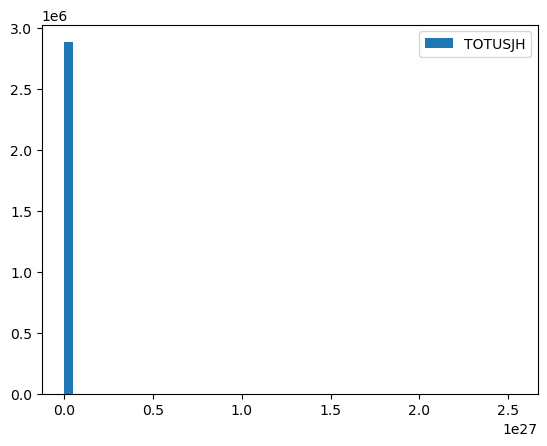

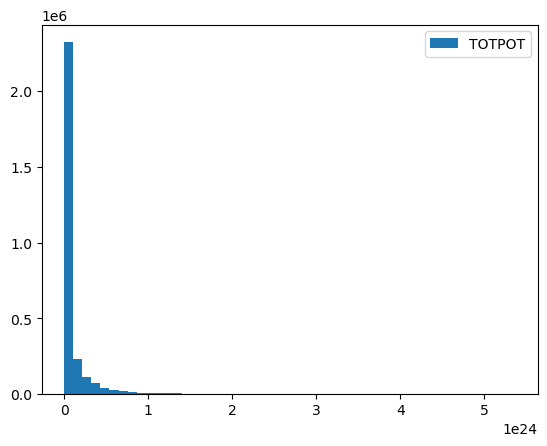

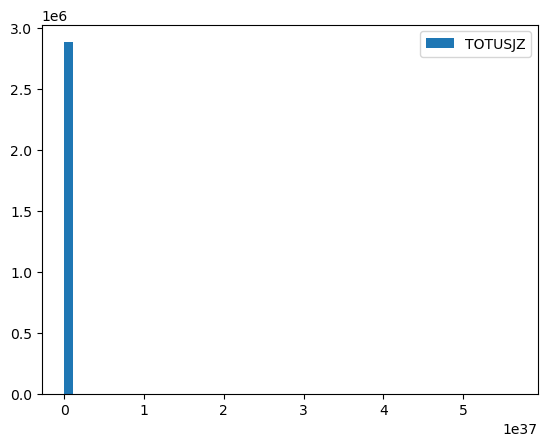

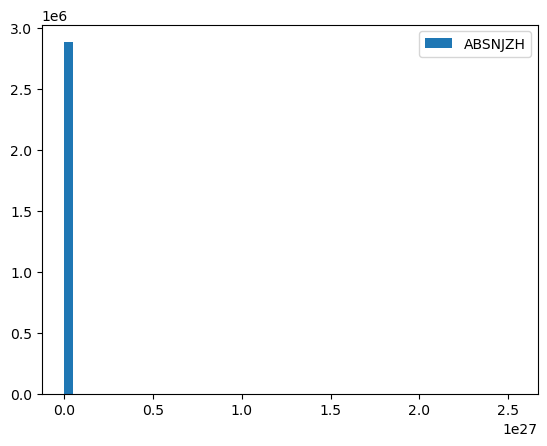

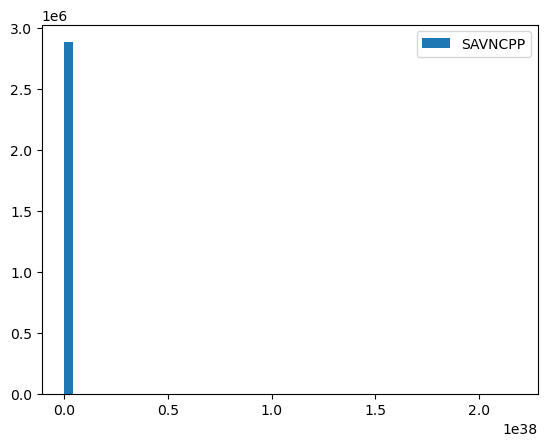

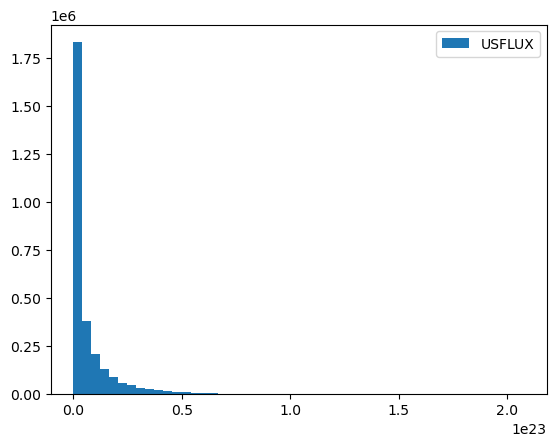

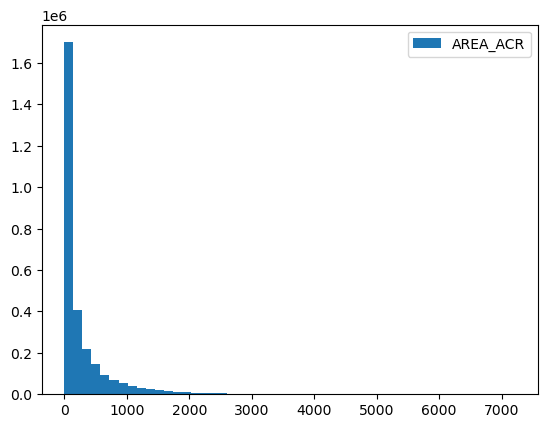

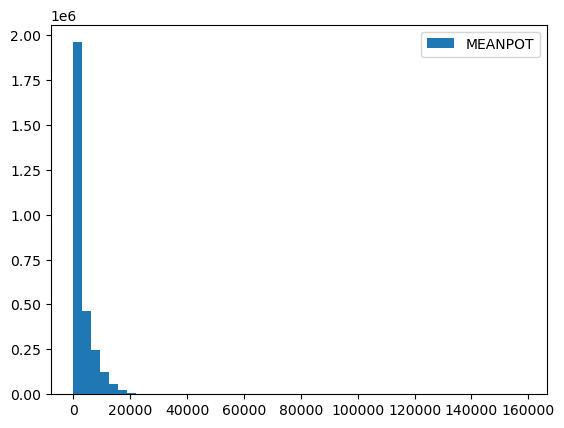

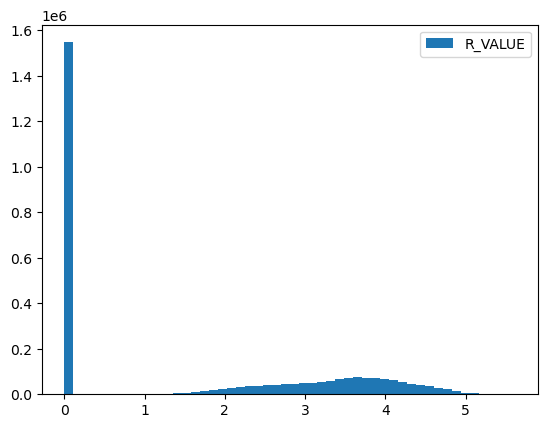

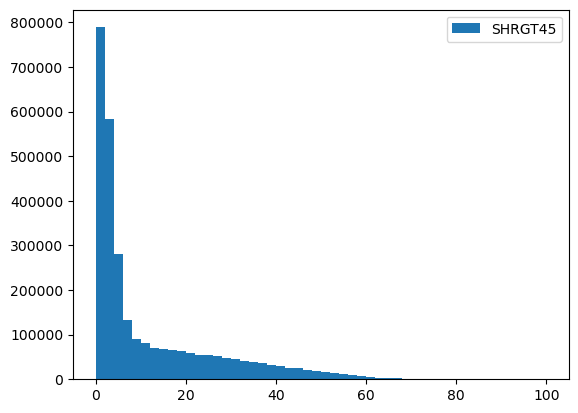

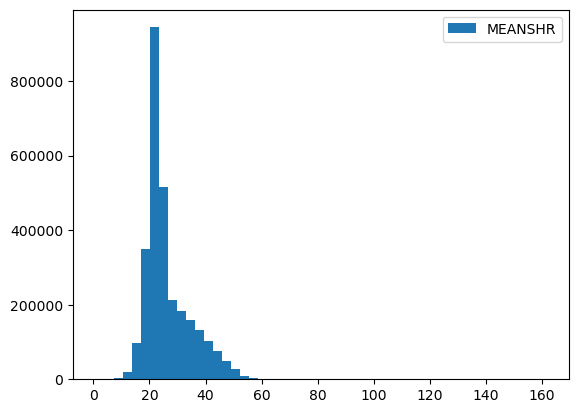

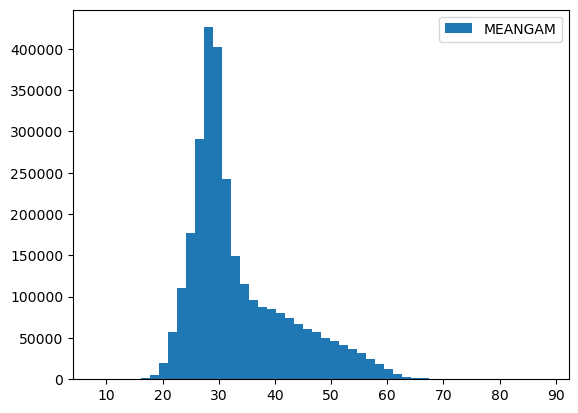

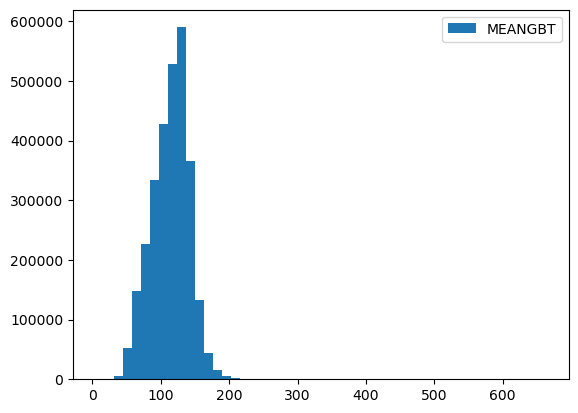

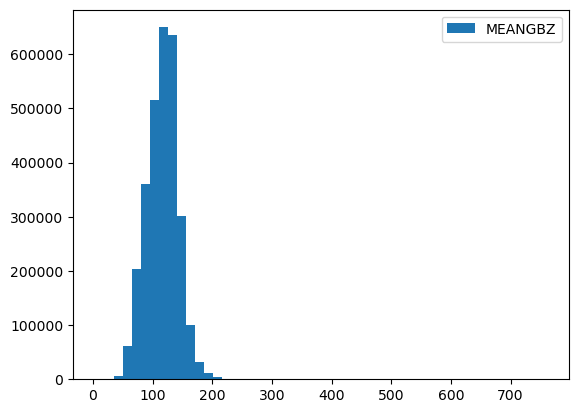

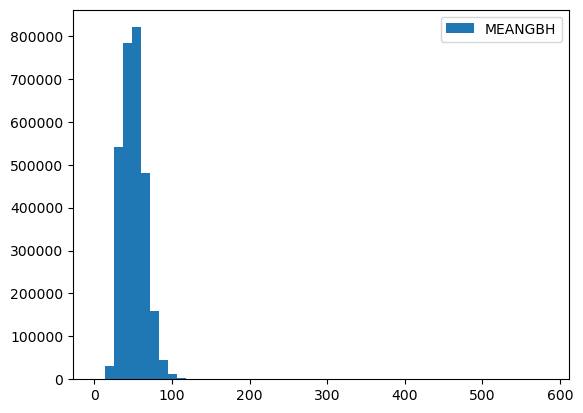

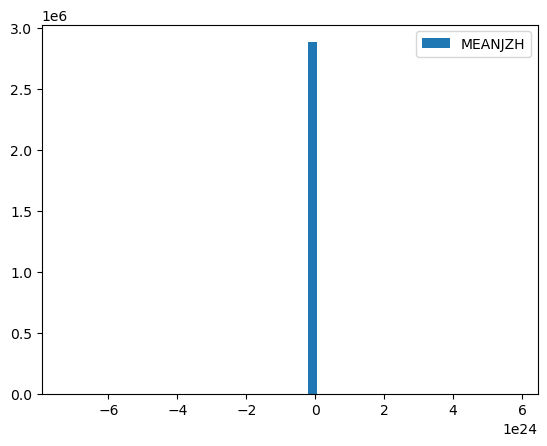

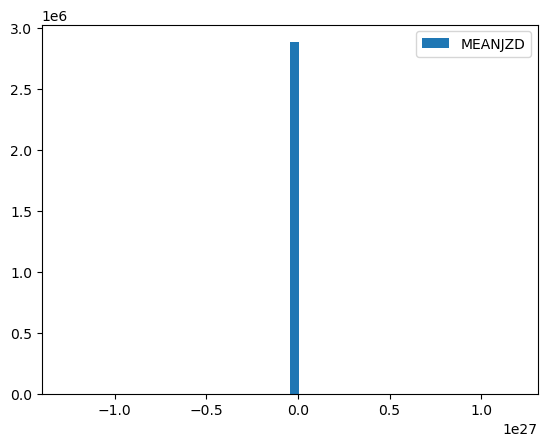

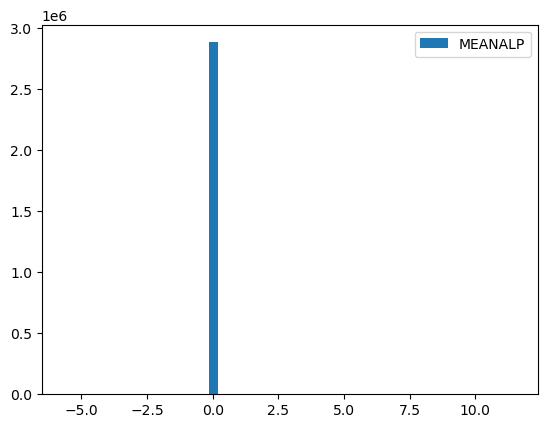

In [4]:
# Data distribution on all features with outliers
for i in range(6, 24):
    x = df.iloc[:,i]
    plt.hist(x, bins=50, label=str(df.columns[i]))
    plt.legend()
    plt.show()

<timed exec>:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


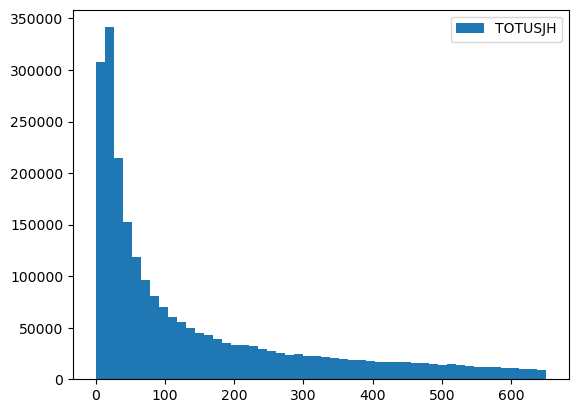

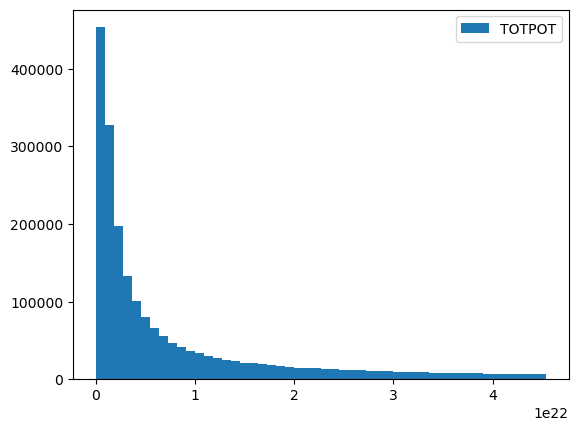

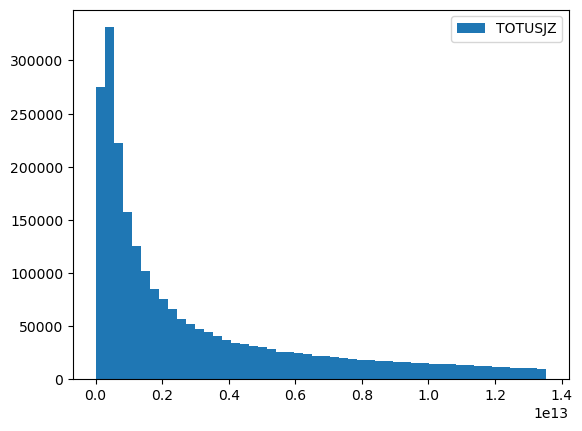

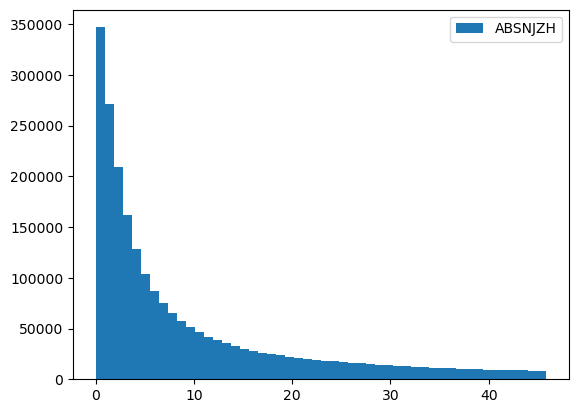

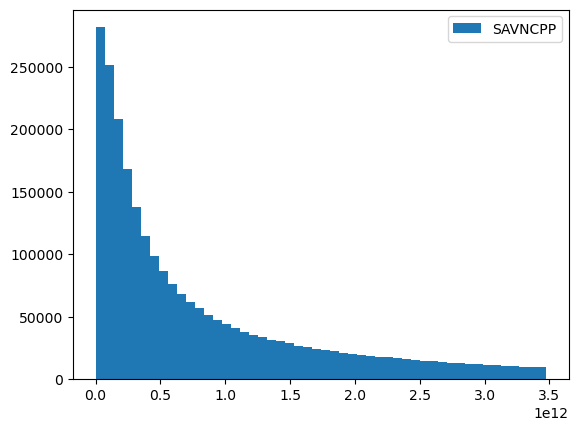

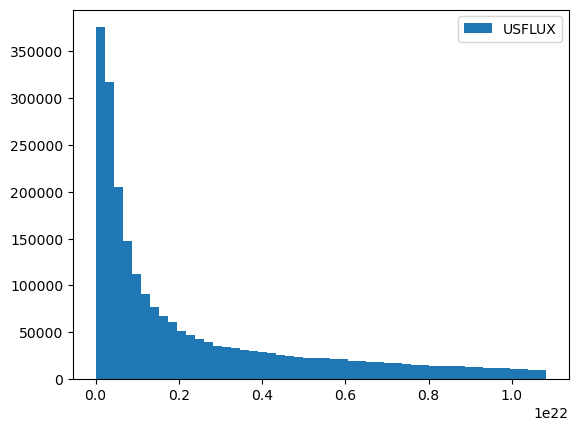

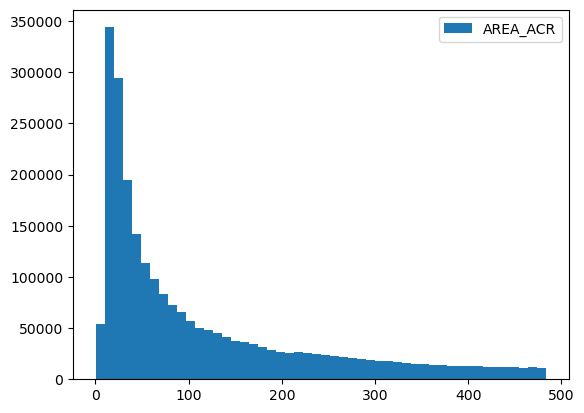

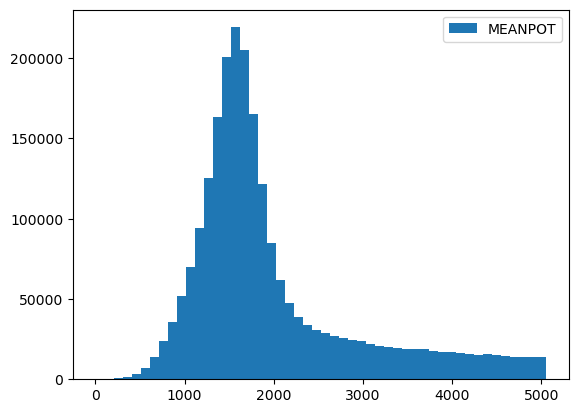

<timed exec>:38: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:38: RuntimeWarning: invalid value encountered in true_divide


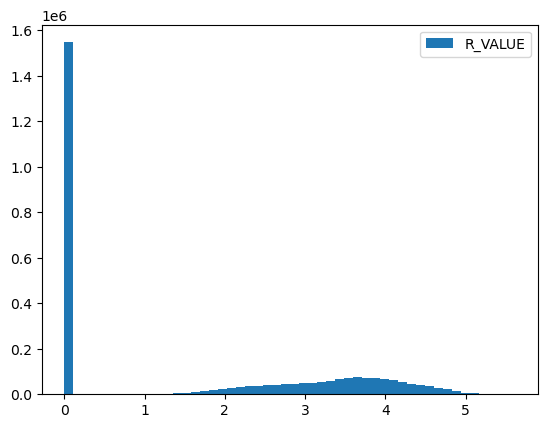

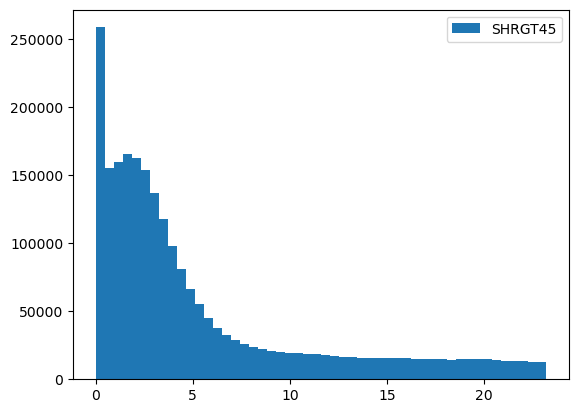

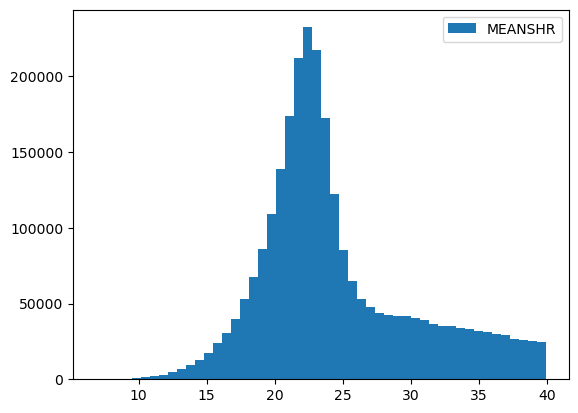

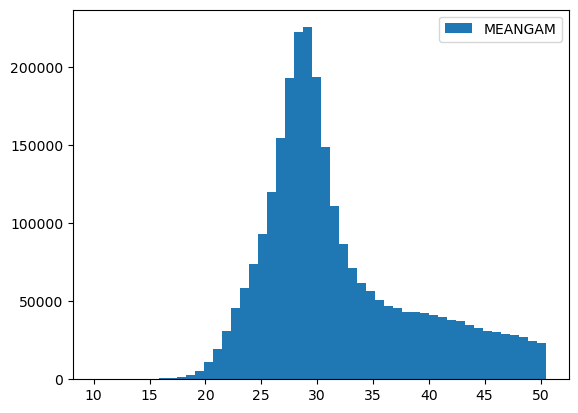

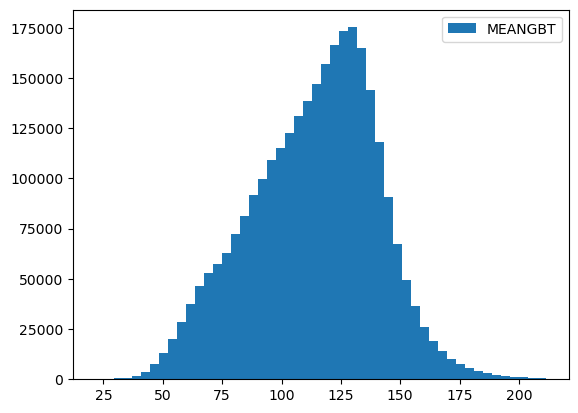

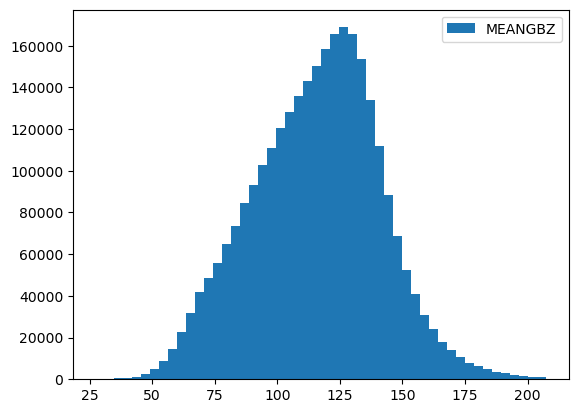

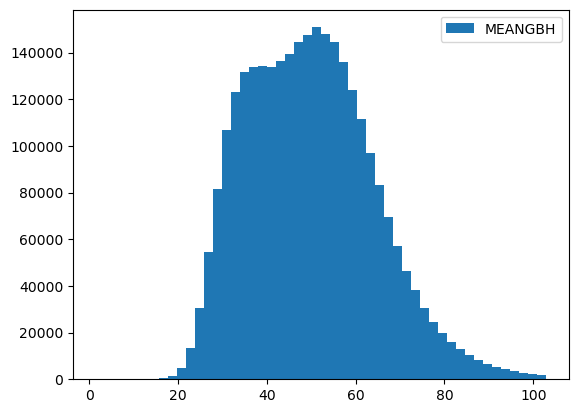

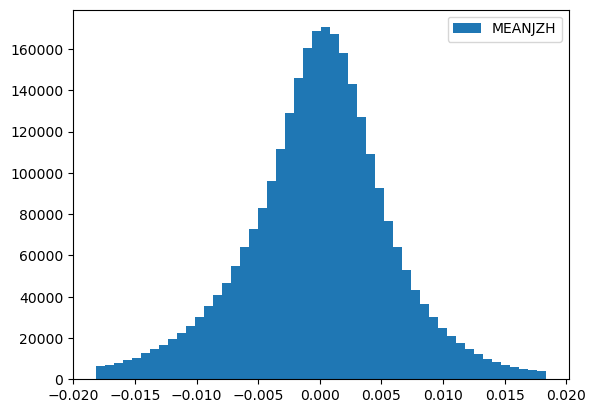

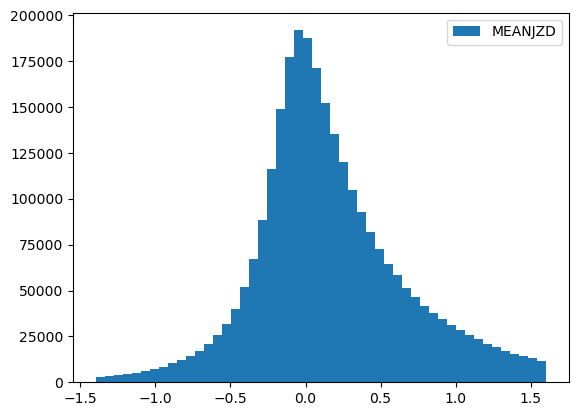

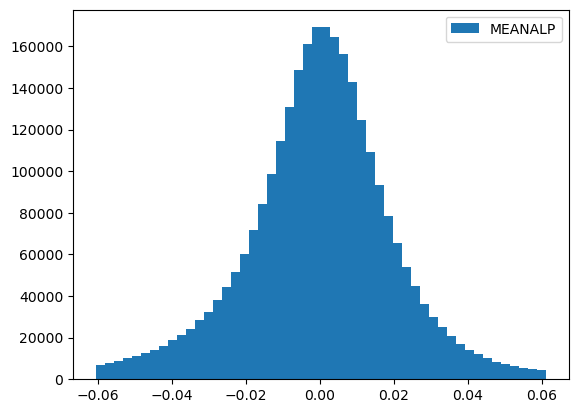

In [5]:
# Data distribution on all features without outliers 
for i in range(6, 24):
    x = df.iloc[:,i]
    filtered = x[~is_outlier(x)]
    if i == 14:                                                  # For R_VALUE, we don't remove the outliers
        plt.hist(x, bins=50, label=str(df.columns[i]))
    else:
        plt.hist(filtered, bins=50, label=str(df.columns[i]))
    plt.legend()
    plt.show()

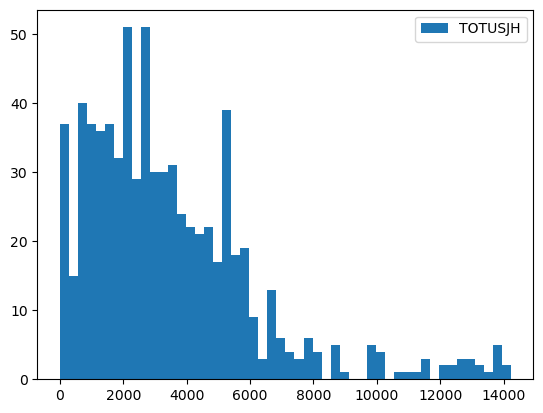

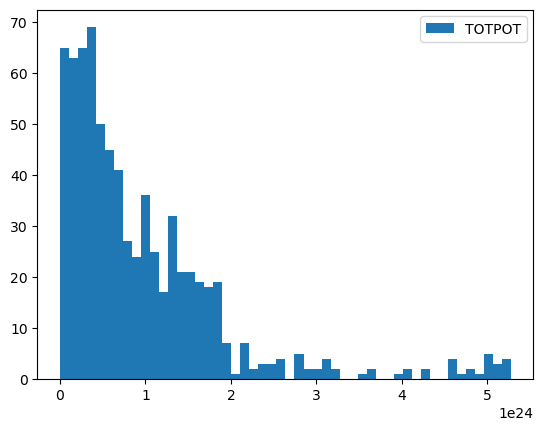

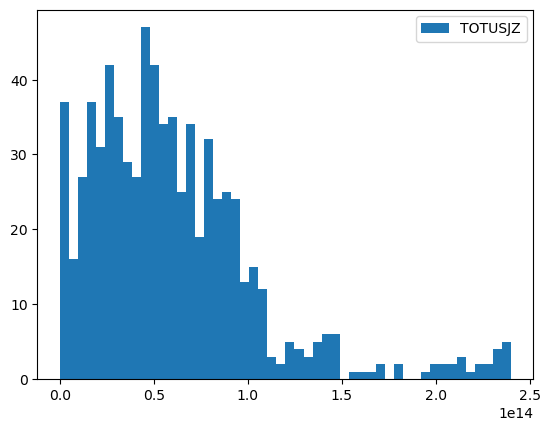

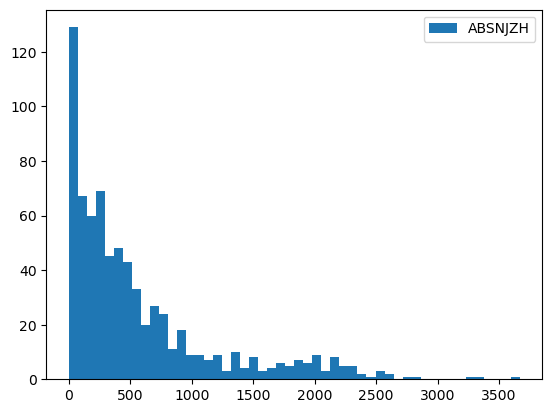

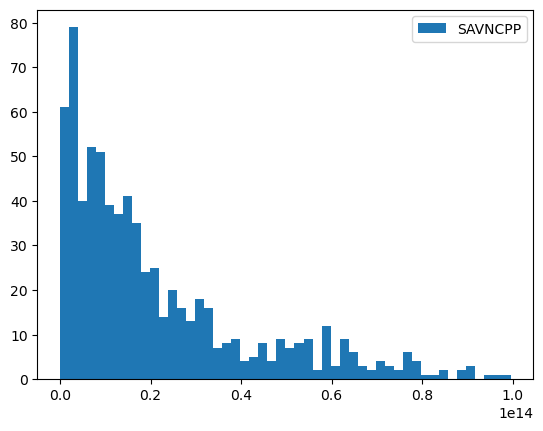

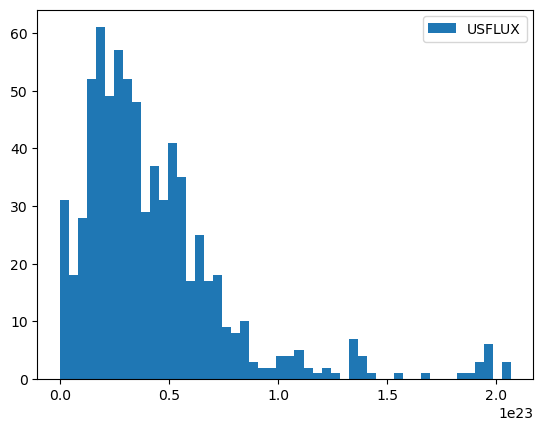

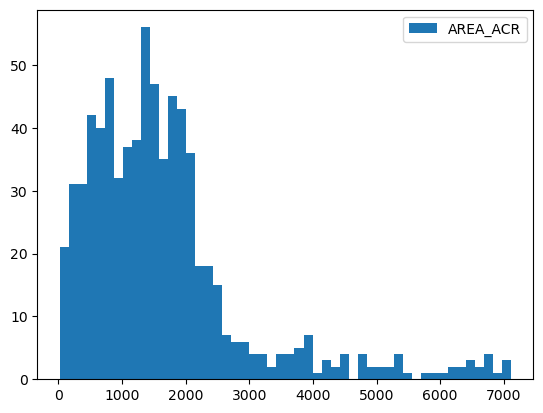

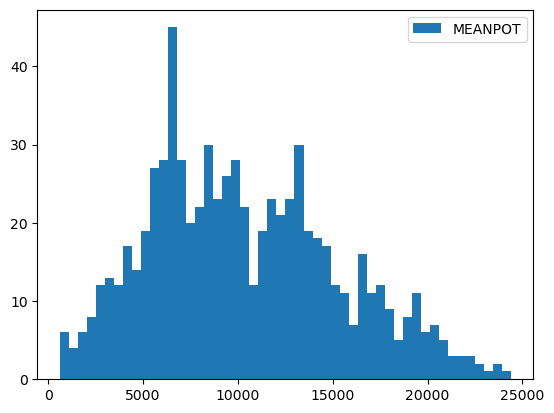

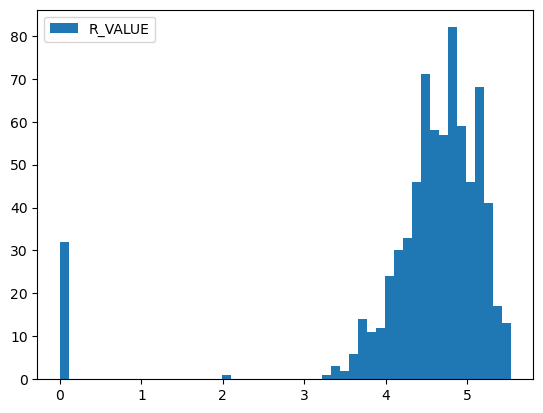

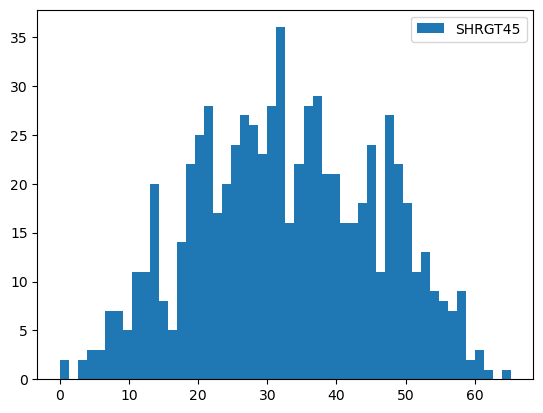

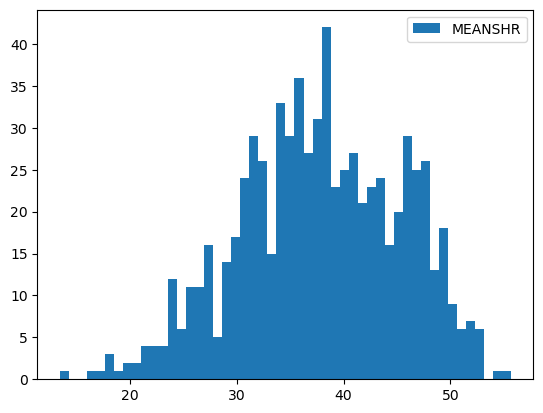

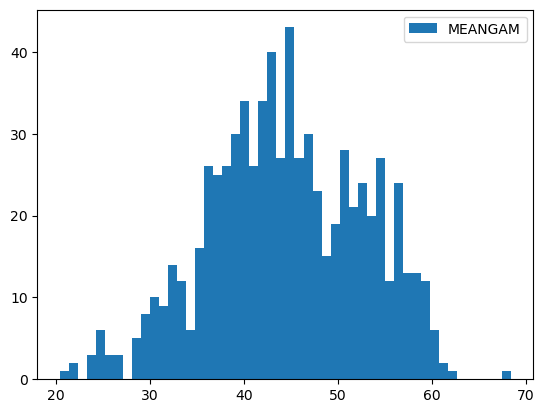

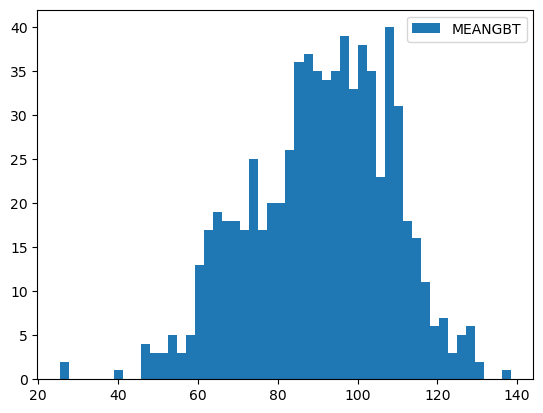

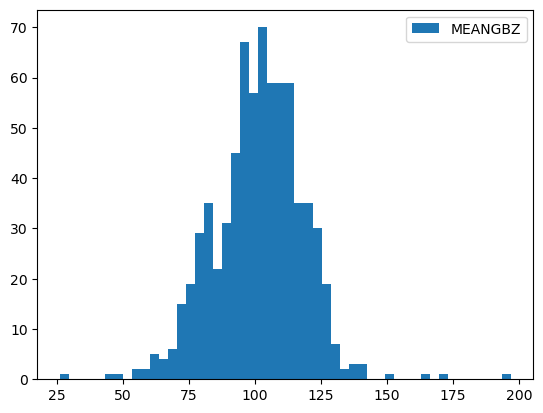

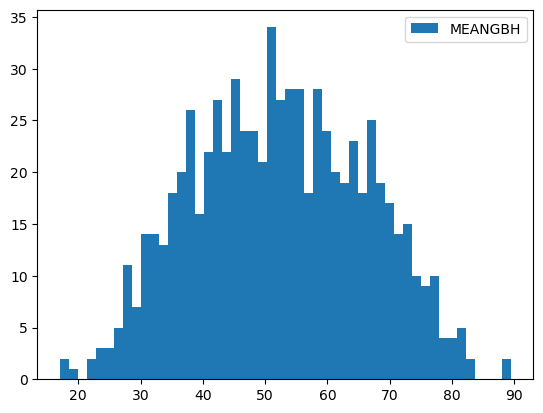

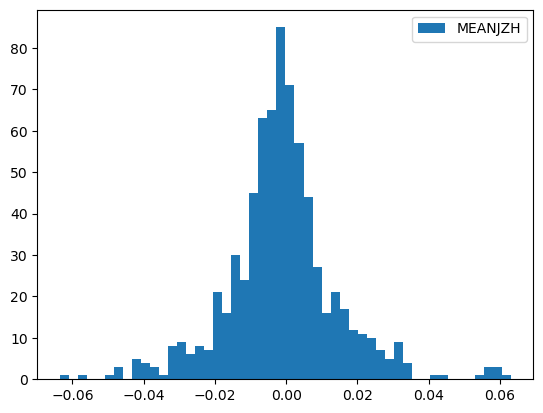

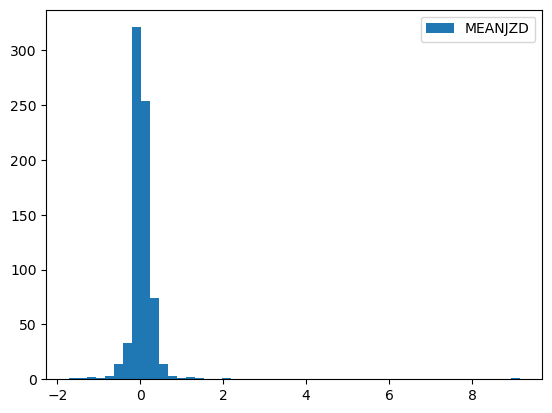

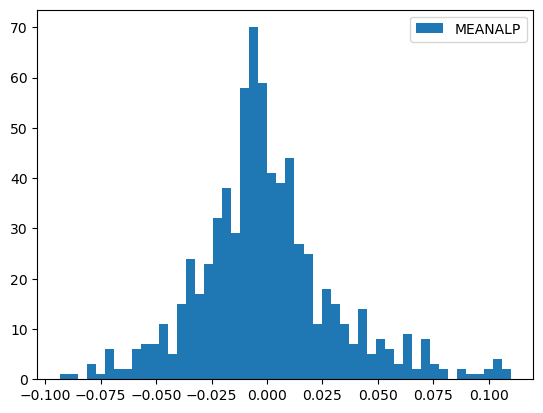

In [6]:
# Data distribution on data point with flares only 
FLARE = df.loc[df['X_or_M'] == 'Y']

for i in range(6, 24):
    x = FLARE.iloc[:,i]
    plt.hist(x, bins=50, label=str(df.columns[i]))
    plt.legend()
    plt.show()

In [7]:
%%time
# RobustScaler normalization
RS = df.copy()                                     # Make a copy of df dataset
for i in range(6, 24):
    transformer = RobustScaler()
    x = np.array(RS.iloc[:,i]).reshape(-1, 1)
    transformer.fit(x)
    transformed_data = transformer.transform(x)
    RS.loc[:,RS.columns[i]] = transformed_data

Wall time: 10.2 s


In [8]:
%%time
# PowerTransformer normalisation
PT = df.copy()
for i in range(6, 24):
    x = PT.iloc[:,i]
    if i >= 21 or i == 14:
        transformer = RobustScaler()                             # For R_VALUE and features with normal distribution, we used RobustScaler
    elif i == 7 or i == 11:
        x = np.where(x > 0, x, 0)                                # There are problem with TOTPOT and USFLUX where they have negative values
        transformer = PowerTransformer(method='box-cox')         # We change these negative into zero and applied box-cox transformation in order to turn arround this
    else:
        transformer = PowerTransformer(method='yeo-johnson')
    x = np.array(x).reshape(-1, 1)
    transformer.fit(x)
    transformed_data = transformer.transform(x)
    PT.loc[:,PT.columns[i]] = transformed_data

C:\Users\joko\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\joko\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Wall time: 1min 28s


<timed exec>:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


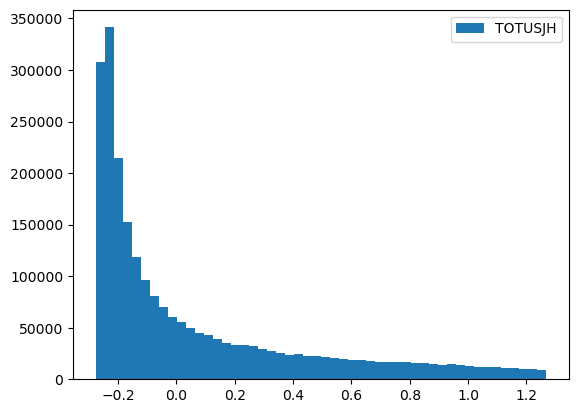

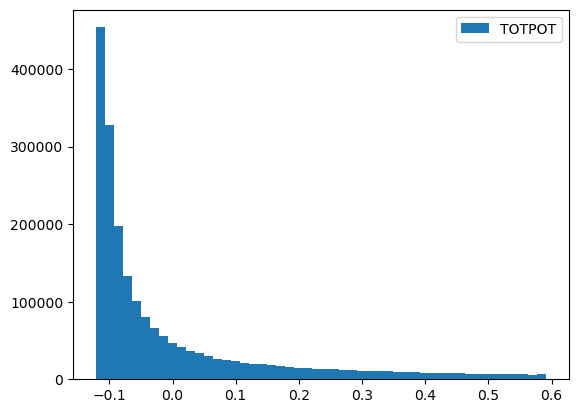

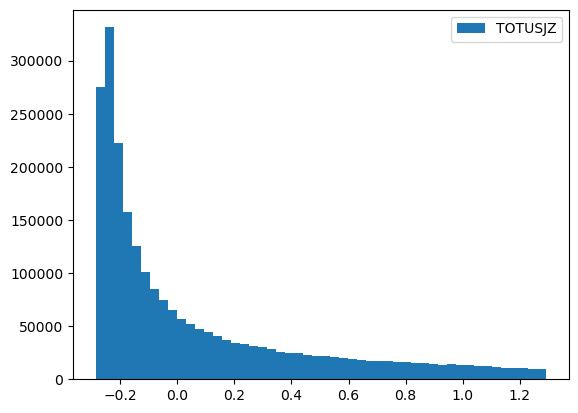

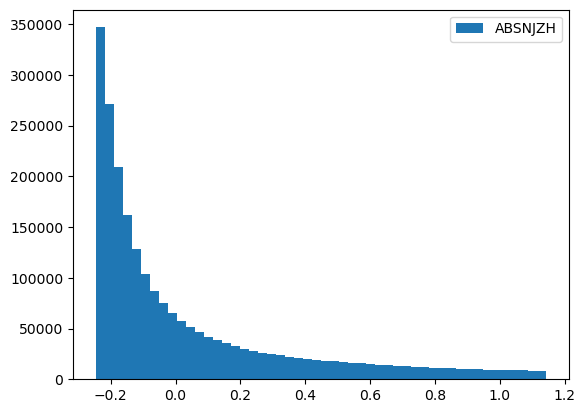

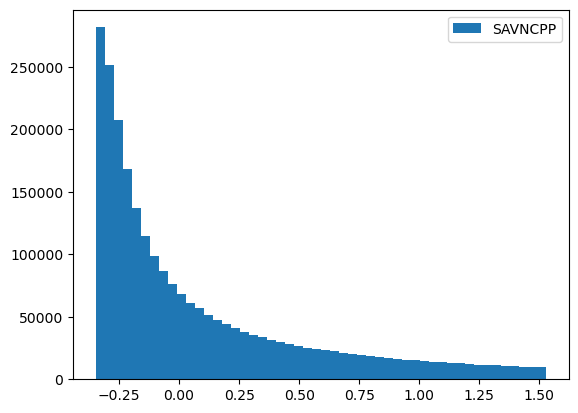

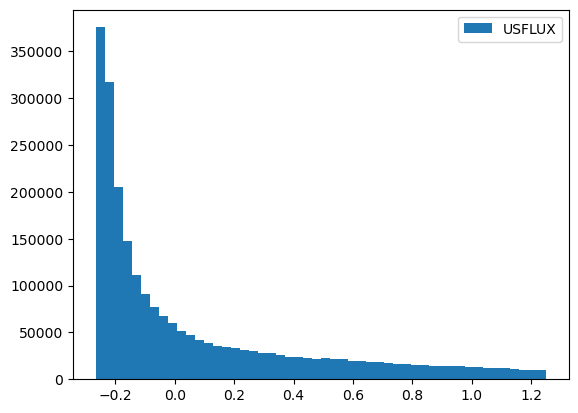

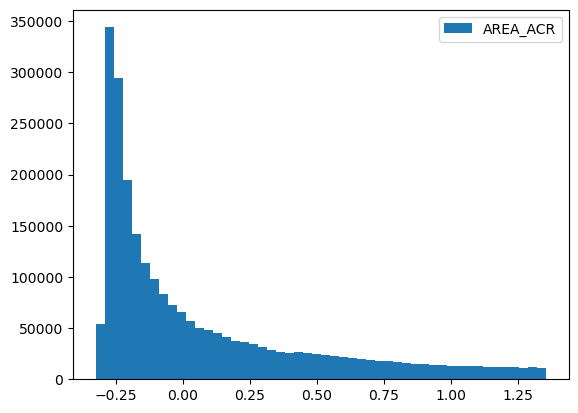

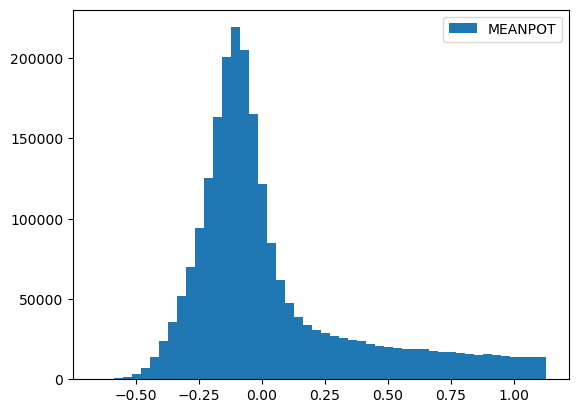

<timed exec>:38: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:38: RuntimeWarning: invalid value encountered in true_divide


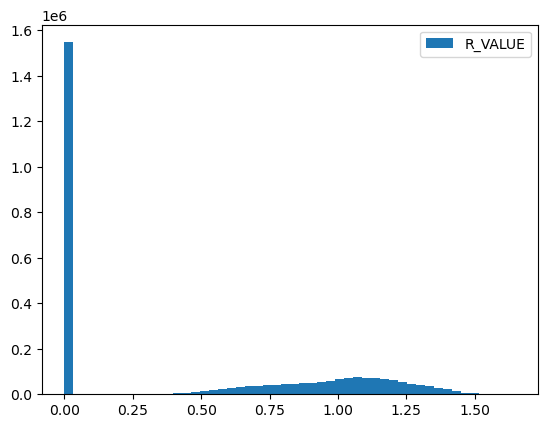

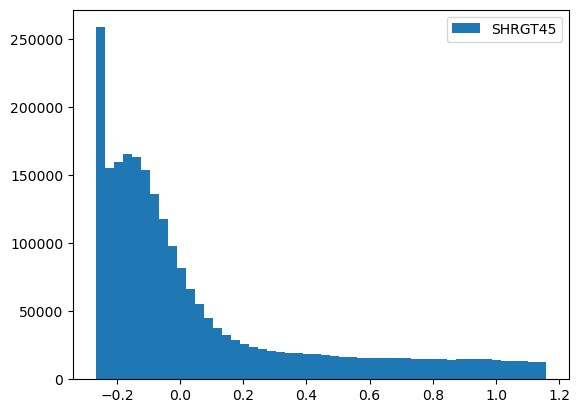

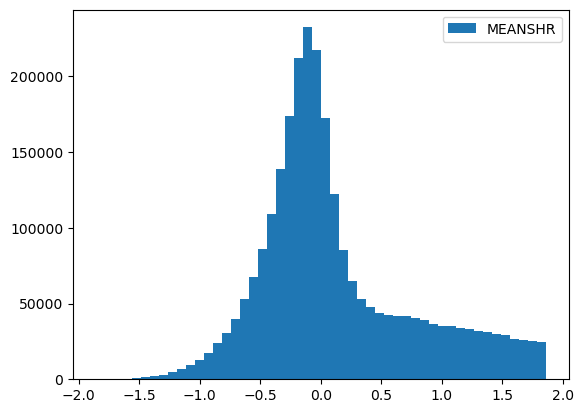

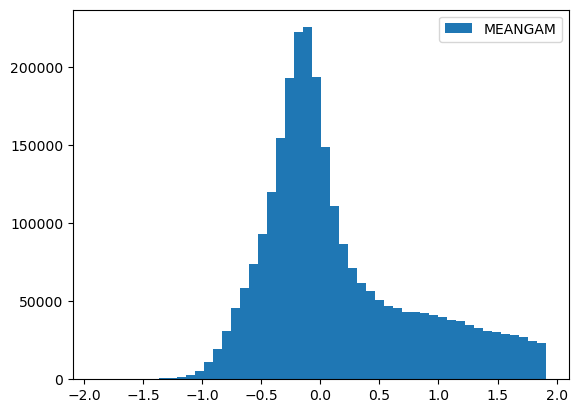

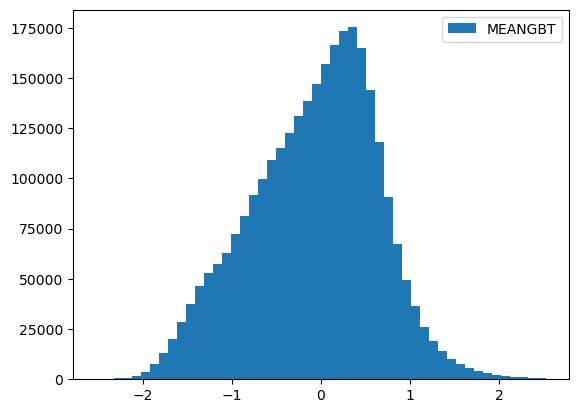

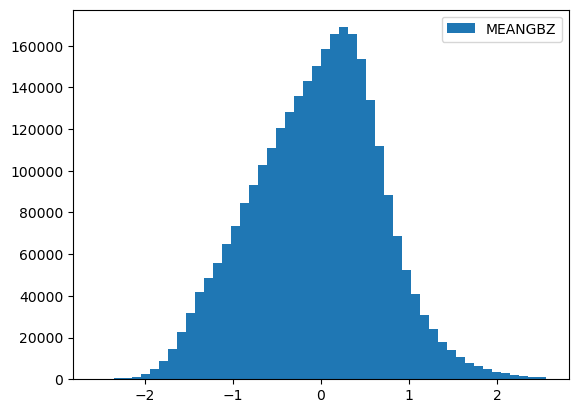

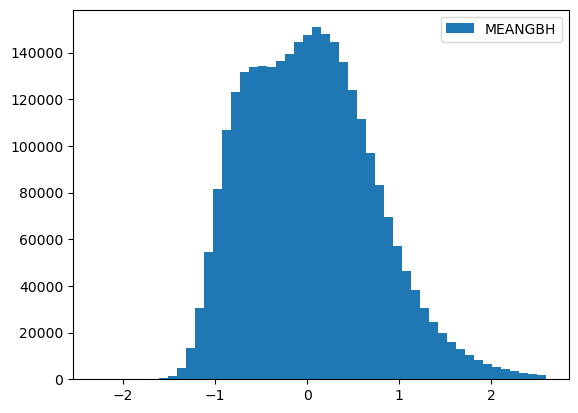

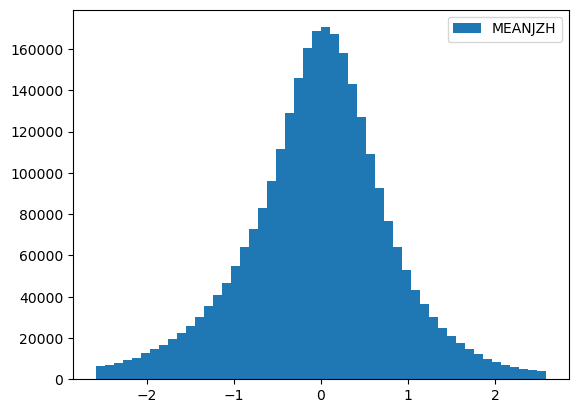

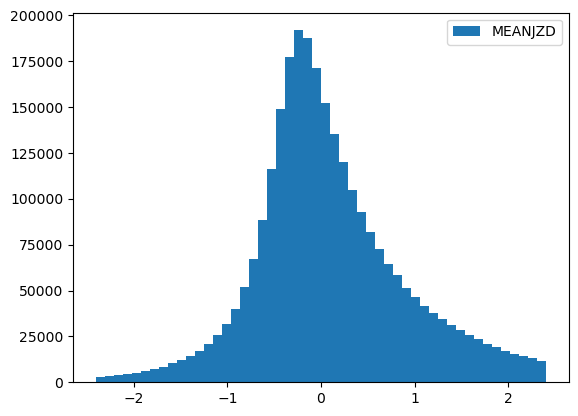

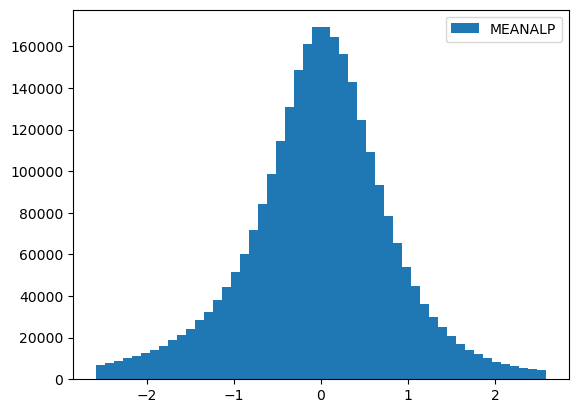

Wall time: 7.27 s


In [9]:
%%time
# RobustScaler normalized data distribution on all features without outliers 
for i in range(6, 24):
    x = RS.iloc[:,i]
    filtered = x[~is_outlier(x)]
    if i == 14:                                                  # For R_VALUE, we don't remove the outliers
        plt.hist(x, bins=50, label=str(df.columns[i]))
    else:
        plt.hist(filtered, bins=50, label=str(df.columns[i]))
    plt.legend()
    plt.show()

<timed exec>:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


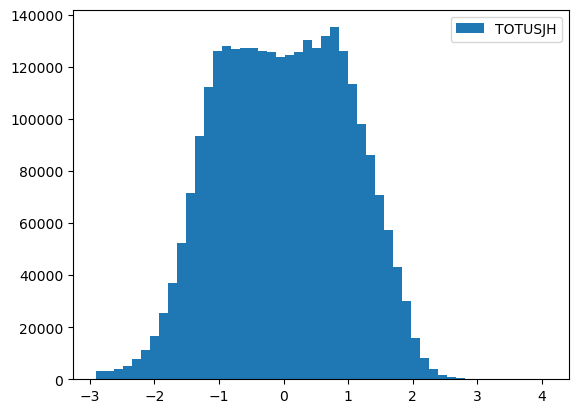

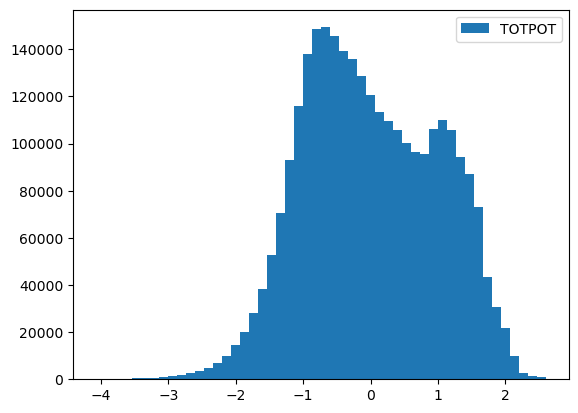

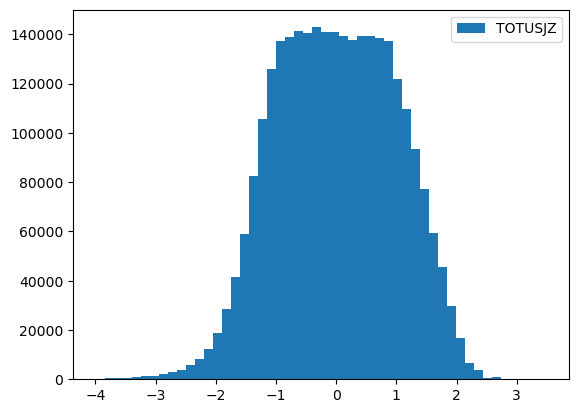

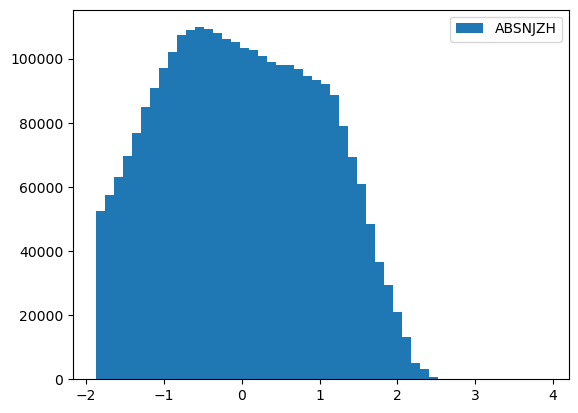

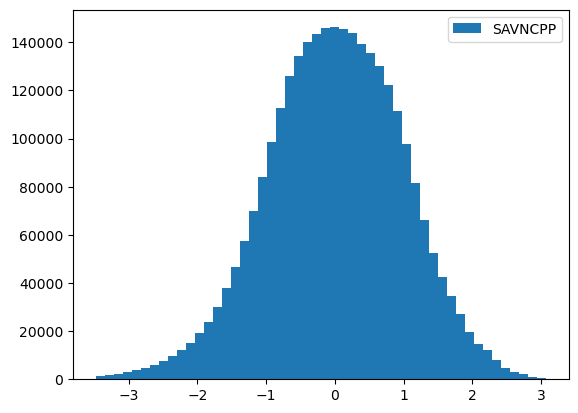

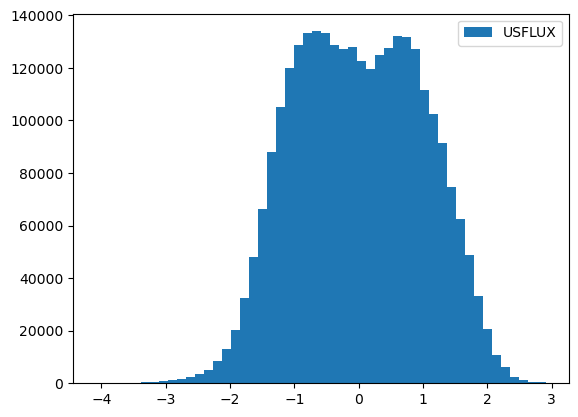

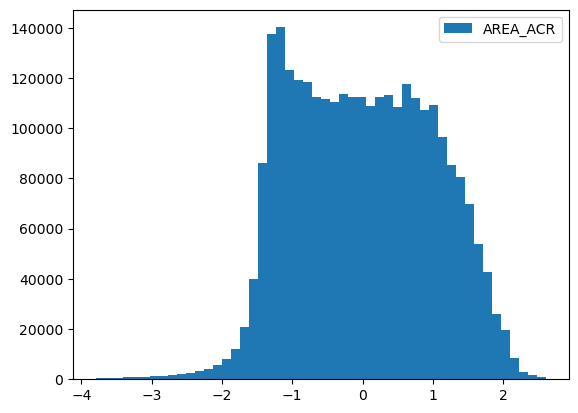

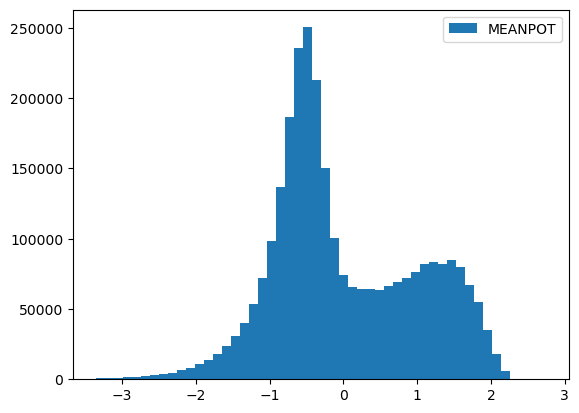

<timed exec>:38: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:38: RuntimeWarning: invalid value encountered in true_divide


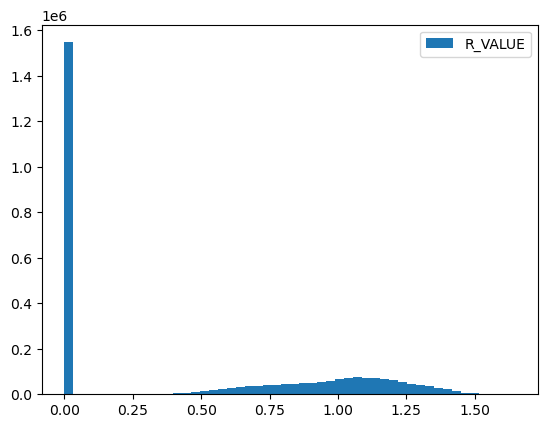

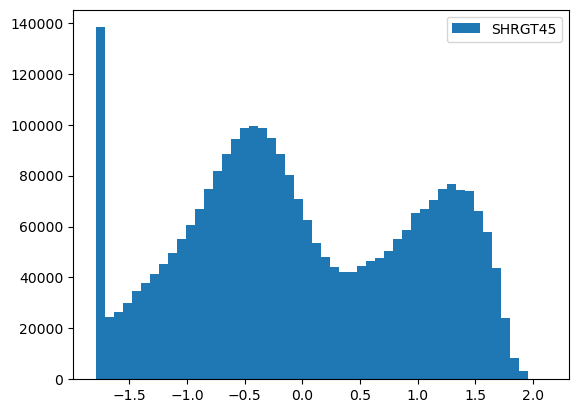

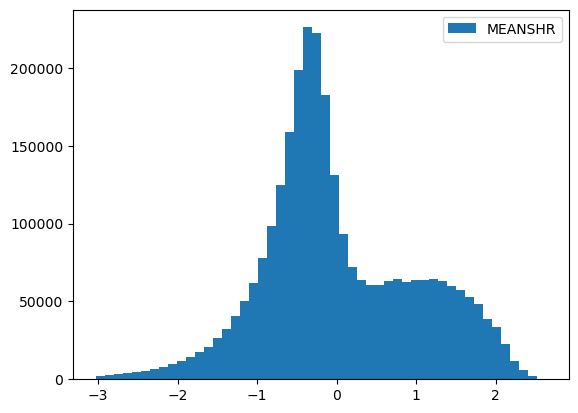

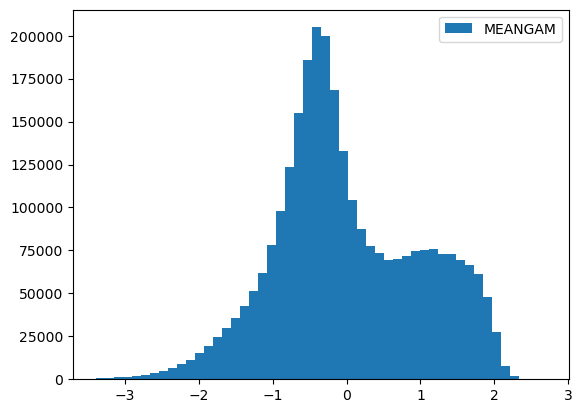

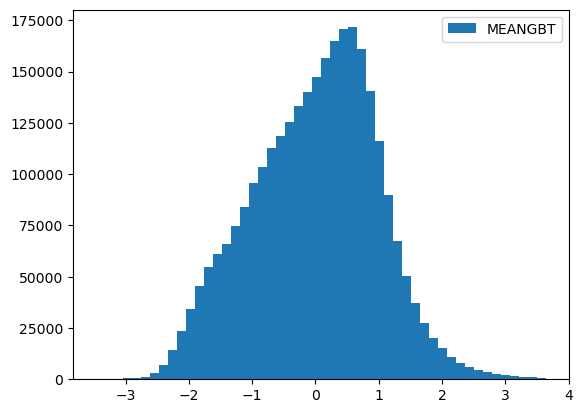

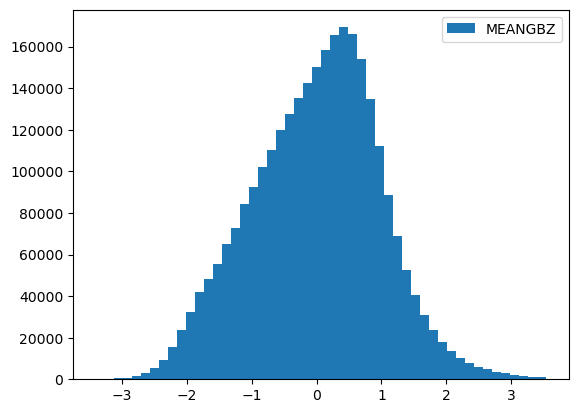

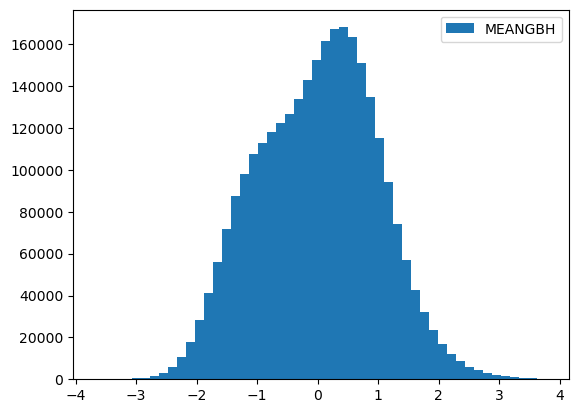

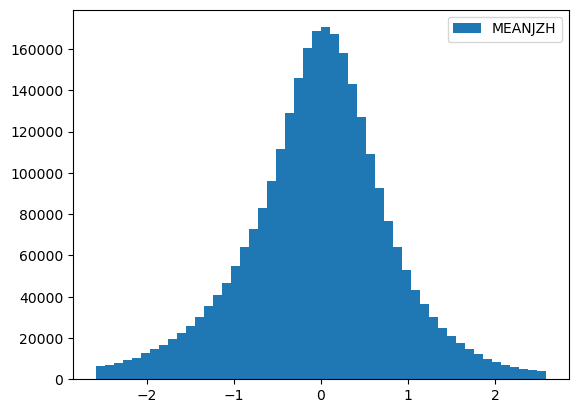

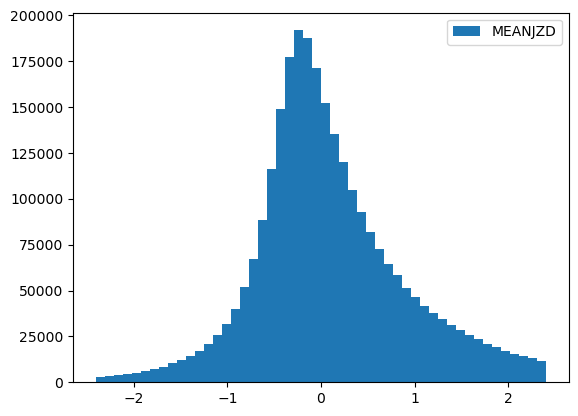

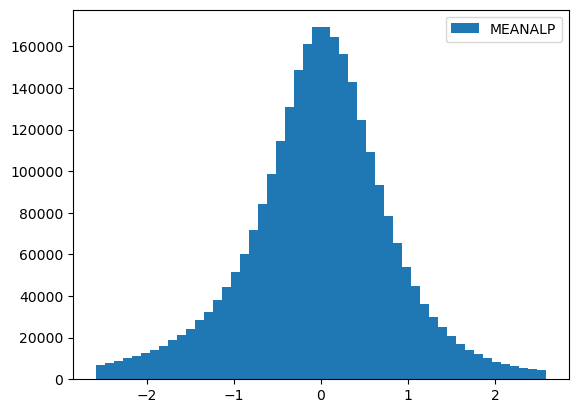

Wall time: 7.17 s


In [10]:
%%time
# PowerTransform normalized data distribution on all features without outliers 
for i in range(6, 24):
    x = PT.iloc[:,i]
    filtered = x[~is_outlier(x)]
    if i == 14:                                                  # For R_VALUE, we don't remove the outliers
        plt.hist(x, bins=50, label=str(df.columns[i]))
    else:
        plt.hist(filtered, bins=50, label=str(df.columns[i]))
    plt.legend()
    plt.show()

Before saving the dataset, we need to filter the AR position in order to avoid high observational error on the edge of solar disk. 

In [11]:
# Filtering from AR positions
edge = 69                                                       # We choose to get the data within range -69 < LON_FTW < 69
PT = PT.loc[(PT['LON_FWT'] < edge) & (PT['LON_FWT'] > -edge)]
RS = RS.loc[(RS['LON_FWT'] < edge) & (RS['LON_FWT'] > -edge)]

From this operation, we lost about 231883 data points, coresponding to 8% of the total data points. This is quite considerable number but this operation is important to avoid projection effects. 

We also lost 160 X and M class flares because of the positional filtering and inf or nan filtering 

In [12]:
count = 0
print('list of index of lost flares caused by positional filtering:')
lost_indexes = []
for i in range(int(np.max(PT['flare_index']))):
    if len(PT.loc[PT['flare_index'] == i]) < 1:
        print(i)
        count += 1
        lost_indexes.append(i)
print('total of ', count, ' flares')

list of index of lost flares caused by positional filtering:
3
6
9
16
22
23
25
26
27
28
29
36
43
52
53
61
62
64
66
80
87
88
101
103
121
122
124
133
136
137
173
174
175
179
180
181
182
183
184
185
189
190
192
193
202
205
211
212
218
220
221
222
223
227
231
248
249
250
259
263
264
268
269
282
285
295
299
304
305
306
307
308
309
310
311
312
313
314
348
349
350
351
354
355
364
366
367
374
381
382
395
401
405
434
435
436
437
438
439
440
441
442
443
444
445
464
479
480
481
482
491
506
512
513
514
515
516
520
521
522
524
525
526
527
549
552
559
560
561
572
573
580
583
584
602
605
629
630
631
632
633
635
639
640
644
652
664
666
667
676
679
687
705
706
707
716
717
718
719
720
total of  160  flares


As you can see below the flares we lost have longitude l > |69| 

In [13]:
for i in lost_indexes:
    display(df.loc[df['flare_index'] == i])

,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
18700,2010.06.13_05:36:00_TAI,49,11079,11079,82.170593,-23.668484,263.345,5.373352e+22,4244513000000.0,34.082,...,0.01083,2010-06-13 05:36:00,2010-06-13 05:39:00,XRA,1079.0,M1,M,Y,3.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
87525,2010.11.05_00:00:00_TAI,245,"11121,11123",11121,-75.604645,-19.744545,765.945,1.079899e+23,13540370000000.0,15.475,...,-0.001844,2010-11-05 00:00:00,2010-11-05 23:58:00,XRA,1121.0,M1,M,Y,6.0,N
87647,2010.11.05_00:00:00_TAI,245,"11121,11123",11121,-75.604645,-19.744545,765.945,1.079899e+23,13540370000000.0,15.475,...,-0.001844,2010-11-05 00:00:00,2010-11-05 23:58:00,XRA,1121.0,M1,M,Y,6.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
137002,2011.02.09_01:36:00_TAI,362,11153,11153,73.772667,15.334504,1406.586,3.353422e+23,21765940000000.0,127.875,...,-0.008174,2011-02-09 01:36:00,2011-02-09 01:31:00,XRA,1153.0,M1,M,Y,9.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
149157,2011.02.24_07:36:00_TAI,392,11163,11163,-82.220673,15.970417,35.913,1.496720e+22,892147600000.0,1.838,...,0.004683,2011-02-24 07:36:00,2011-02-24 07:35:00,XRA,1163.0,M3,M,Y,16.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
155449,2011.03.07_08:00:00_TAI,394,11165,11165,71.283081,-18.329834,3601.149,6.688521e+23,53670090000000.0,384.735,...,0.011175,2011-03-07 08:00:00,2011-03-07 07:54:00,XRA,1165.0,M1,M,Y,22.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
155518,2011.03.07_21:48:00_TAI,394,11165,11165,78.326019,-18.20405,3389.584,7.980438e+23,50236980000000.0,1043.715,...,0.031911,2011-03-07 21:48:00,2011-03-07 21:50:00,XRA,1165.0,M1,M,Y,23.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
156427,2011.03.08_02:24:00_TAI,394,11165,11165,80.25901,-18.118179,2425.298,7.065112e+23,36025130000000.0,634.988,...,0.025291,2011-03-08 02:24:00,2011-03-08 02:29:00,XRA,1165.0,M1,M,Y,25.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
156469,2011.03.08_10:48:00_TAI,394,11165,11165,84.192177,-18.039734,1329.209,3.837004e+23,18368780000000.0,489.927,...,0.027641,2011-03-08 10:48:00,2011-03-08 10:44:00,XRA,1165.0,M5,M,Y,26.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
156507,2011.03.08_18:24:00_TAI,394,11165,11165,86.816452,-18.151321,116.964,4.440187e+22,2856328000000.0,22.959,...,0.015346,2011-03-08 18:24:00,2011-03-08 18:28:00,XRA,1165.0,M4,M,Y,27.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
156516,2011.03.08_20:12:00_TAI,394,11165,11165,87.40815,-18.095705,20.377,4.121912e+21,779237500000.0,1.226,...,0.005458,2011-03-08 20:12:00,2011-03-08 20:16:00,XRA,1165.0,M1,M,Y,28.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
157403,2011.03.08_04:00:00_TAI,415,11171,11171,-69.416428,-20.404123,73.313,4.471240e+21,1559268000000.0,21.55,...,0.021318,2011-03-08 04:00:00,2011-03-08 03:58:00,XRA,1171.0,M1,M,Y,29.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
167922,2011.03.23_02:12:00_TAI,437,"11176,11178",11176,-69.377731,-16.639311,2020.481,6.041245e+23,35458410000000.0,239.352,...,0.009449,2011-03-23 02:12:00,2011-03-23 02:17:00,XRA,1176.0,M1,M,Y,36.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
244666,2011.06.14_21:48:00_TAI,667,11236,11236,-72.999741,16.42774,2321.139,6.190474e+23,36683360000000.0,492.704,...,0.016478,2011-06-14 21:48:00,2011-06-14 21:47:00,XRA,1236.0,M1,M,Y,43.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
292584,2011.08.09_04:00:00_TAI,753,11263,11263,69.67926,17.816025,2863.146,7.628041e+23,44478000000000.0,1320.584,...,0.050776,2011-08-09 04:00:00,2011-08-09 03:54:00,XRA,1263.0,M2,M,Y,52.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
292604,2011.08.09_08:00:00_TAI,753,11263,11263,71.861282,17.754868,3006.346,7.355636e+23,42300500000000.0,1008.594,...,0.038296,2011-08-09 08:00:00,2011-08-09 08:05:00,XRA,1263.0,X6,X,Y,53.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
341645,2011.09.22_10:00:00_TAI,892,11302,11302,-80.168053,11.928522,1854.37,7.440161e+23,29416660000000.0,271.608,...,-0.011639,2011-09-22 10:00:00,2011-09-22 10:00:00,XRA,1302.0,M1,M,Y,61.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
341649,2011.09.22_11:00:00_TAI,892,11302,11302,-79.748962,11.962186,2255.434,8.016564e+23,33729700000000.0,210.86,...,-0.008285,2011-09-22 11:00:00,2011-09-22 11:01:00,XRA,1302.0,X1,X,Y,62.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
341883,2011.09.23_22:12:00_TAI,856,"11295,11296,11298",11295,69.182625,24.049805,3793.788,9.696899e+23,65471270000000.0,95.127,...,0.002216,2011-09-23 22:12:00,2011-09-23 22:15:00,XRA,1295.0,M1,M,Y,64.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
343099,2011.09.24_17:00:00_TAI,856,"11295,11296,11298",11295,79.538887,24.27993,2017.464,7.110215e+23,33777340000000.0,215.253,...,0.007572,2011-09-24 17:00:00,2011-09-24 16:59:00,XRA,1295.0,M1,M,Y,66.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
345343,2011.09.25_09:36:00_TAI,899,11303,11303,70.238297,-28.350761,1221.772,3.060729e+23,20295010000000.0,151.441,...,-0.014048,2011-09-25 09:36:00,2011-09-25 09:35:00,XRA,1303.0,M1,M,Y,80.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
378832,2011.10.22_11:12:00_TAI,940,"11314,11319",11314,84.104347,17.975479,636.026,1.059219e+23,13016090000000.0,25.05,...,-0.002998,2011-10-22 11:12:00,2011-10-22 11:10:00,XRA,1314.0,M1,M,Y,87.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
391815,2011.11.02_22:00:00_TAI,1028,"11339,11348",11339,-71.368118,19.314966,5230.673,1.977221e+24,82043090000000.0,54.714,...,0.000873,2011-11-02 22:00:00,2011-11-02 22:01:00,XRA,1339.0,M4,M,Y,88.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
503873,2012.01.27_18:36:00_TAI,1321,"11401,11402,11405,11407",11402,81.436485,29.598328,211.578,5.041275e+22,5822789000000.0,18.262,...,-0.007368,2012-01-27 18:36:00,2012-01-27 18:37:00,XRA,1402.0,X1,X,Y,101.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
539353,2012.03.02_17:48:00_TAI,1449,"11429,11430",11429,-83.821152,17.655815,0.479,7.414932e+19,30391450000.0,0.088,...,0.054262,2012-03-02 17:48:00,2012-03-02 17:46:00,XRA,1429.0,M3,M,Y,103.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
560835,2012.03.23_19:36:00_TAI,1500,11445,11445,-80.937416,-22.684679,831.18,1.675625e+23,12246370000000.0,74.173,...,0.007647,2012-03-23 19:36:00,2012-03-23 19:40:00,XRA,1445.0,M1,M,Y,121.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
586288,2012.04.16_17:48:00_TAI,1582,11461,11461,-82.696175,11.289869,167.598,2.457591e+22,2570871000000.0,23.891,...,-0.0173,2012-04-16 17:48:00,2012-04-16 17:45:00,XRA,1461.0,M1,M,Y,122.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
608553,2012.05.06_01:24:00_TAI,1638,11476,11476,-71.392029,10.626703,3747.962,1.038775e+24,57453130000000.0,464.862,...,-0.011199,2012-05-06 01:24:00,2012-05-06 01:18:00,XRA,1476.0,M1,M,Y,124.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
621037,2012.05.17_01:48:00_TAI,1638,11476,11476,75.256699,10.743164,1411.58,5.078599e+23,26377460000000.0,149.025,...,-0.007156,2012-05-17 01:48:00,2012-05-17 01:47:00,XRA,1476.0,M5,M,Y,133.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
653374,2012.06.09_11:36:00_TAI,1750,"11504,11505",11504,-74.569725,-15.513855,872.398,1.483901e+23,13872560000000.0,182.395,...,0.020388,2012-06-09 11:36:00,2012-06-09 11:32:00,XRA,1504.0,M1,M,Y,136.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
653400,2012.06.09_16:48:00_TAI,1750,"11504,11505",11504,-71.400841,-14.738512,983.147,1.917036e+23,16641430000000.0,37.519,...,0.003478,2012-06-09 16:48:00,2012-06-09 16:53:00,XRA,1504.0,M1,M,Y,137.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
681507,2012.07.08_09:48:00_TAI,1807,"11514,11515",11515,69.238739,-16.824865,5502.838,1.484927e+24,79214020000000.0,148.174,...,-0.002786,2012-07-08 09:48:00,2012-07-08 09:53:00,XRA,1515.0,M1,M,Y,173.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
681519,2012.07.08_12:12:00_TAI,1807,"11514,11515",11515,70.493477,-16.883202,5210.07,1.409214e+24,72974640000000.0,123.473,...,-0.002488,2012-07-08 12:12:00,2012-07-08 12:10:00,XRA,1515.0,M1,M,Y,174.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
681541,2012.07.08_16:36:00_TAI,1807,"11514,11515",11515,72.63118,-16.939884,4776.138,1.189945e+24,67747440000000.0,128.872,...,-0.002671,2012-07-08 16:36:00,2012-07-08 16:32:00,XRA,1515.0,M6,M,Y,175.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
711758,2012.08.18_00:24:00_TAI,1946,11548,11548,-87.790962,19.956869,76.662,1.402210e+22,1286395000000.0,1.453,...,-0.001711,2012-08-18 00:24:00,2012-08-18 01:02:00,XRA,1548.0,M5,M,Y,180.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
711773,2012.08.18_03:24:00_TAI,1946,11548,11548,-86.546059,19.980829,214.74,3.213789e+22,3317060000000.0,1.496,...,-0.000645,2012-08-18 03:24:00,2012-08-18 03:23:00,XRA,1548.0,M1,M,Y,181.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
711837,2012.08.18_16:12:00_TAI,1946,11548,11548,-79.066605,19.83354,1018.212,1.279405e+23,15990860000000.0,98.299,...,0.012627,2012-08-18 16:12:00,2012-08-18 16:07:00,XRA,1548.0,M2,M,Y,182.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
711871,2012.08.18_23:00:00_TAI,1946,11548,11548,-74.946365,19.64587,1031.957,1.214431e+23,18062880000000.0,60.418,...,0.007194,2012-08-18 23:00:00,2012-08-18 22:54:00,XRA,1548.0,M1,M,Y,183.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
711873,2012.08.18_23:24:00_TAI,1946,11548,11548,-74.728249,19.625546,1022.661,1.141038e+23,17434870000000.0,151.909,...,0.017986,2012-08-18 23:24:00,2012-08-18 23:22:00,XRA,1548.0,M1,M,Y,184.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
730584,2012.08.30_12:12:00_TAI,1996,11563,11563,-77.804077,-26.188578,431.641,9.041273e+22,7380480000000.0,14.532,...,-0.003429,2012-08-30 12:12:00,2012-08-30 12:11:00,XRA,1563.0,M1,M,Y,185.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
786209,2012.10.20_18:12:00_TAI,2137,11598,11598,-84.22924,-12.569434,0.111,5.939468e+19,8084879000.0,0.025,...,0.016608,2012-10-20 18:12:00,2012-10-20 18:14:00,XRA,1598.0,M9,M,Y,189.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
787514,2012.10.21_20:00:00_TAI,2137,11598,11598,-72.257324,-12.318263,2261.916,6.797316e+23,34697810000000.0,253.586,...,0.011074,2012-10-21 20:00:00,2012-10-21 20:03:00,XRA,1598.0,M1,M,Y,190.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
809292,2012.11.08_02:24:00_TAI,2186,"11611,11612",11611,-77.929596,12.131955,680.362,2.315852e+23,10463160000000.0,96.659,...,0.009877,2012-11-08 02:24:00,2012-11-08 02:23:00,XRA,1611.0,M1,M,Y,192.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
812027,2012.11.11_02:36:00_TAI,2193,"11614,11615",11614,-84.093521,14.780935,484.459,1.349198e+23,7980227000000.0,35.119,...,0.005241,2012-11-11 02:36:00,2012-11-11 02:33:00,XRA,1614.0,M1,M,Y,193.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
827301,2012.11.27_16:00:00_TAI,2220,11618,11618,74.242882,8.218294,788.603,1.007043e+23,15307240000000.0,32.735,...,-0.003174,2012-11-27 16:00:00,2012-11-27 15:57:00,XRA,1618.0,M1,M,Y,202.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
870160,2013.01.05_09:36:00_TAI,2362,11652,11652,-83.147522,19.209528,28.235,1.591090e+22,718646100000.0,11.167,...,-0.023129,2013-01-05 09:36:00,2013-01-05 09:31:00,XRA,1652.0,M1,M,Y,205.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
954182,2013.03.21_22:00:00_TAI,2546,11692,11692,78.083977,10.337385,1194.709,3.539224e+23,21758600000000.0,95.091,...,0.005945,2013-03-21 22:00:00,2013-03-21 22:04:00,XRA,1692.0,M1,M,Y,211.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
969801,2013.04.05_17:48:00_TAI,2635,11719,11719,-84.582787,8.778728,11.352,1.258204e+21,318668400000.0,4.441,...,0.043528,2013-04-05 17:48:00,2013-04-05 17:48:00,XRA,1719.0,M2,M,Y,212.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1001930,2013.05.03_17:36:00_TAI,2716,"11738,11739",11739,-77.77964,13.409791,915.997,1.310012e+23,16397540000000.0,154.287,...,0.015738,2013-05-03 17:36:00,2013-05-03 17:32:00,XRA,1739.0,M5,M,Y,218.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1010280,2013.05.10_13:00:00_TAI,2739,11745,11745,-84.631813,12.95513,33.264,4.647351e+21,962740000000.0,7.389,...,0.012067,2013-05-10 13:00:00,2013-05-10 12:56:00,XRA,1745.0,M1,M,Y,220.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1014049,2013.05.13_12:00:00_TAI,2748,11748,11748,-84.079193,11.624781,75.869,1.439426e+22,1381881000000.0,13.106,...,0.018944,2013-05-13 12:00:00,2013-05-13 12:03:00,XRA,1748.0,M1,M,Y,221.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1014069,2013.05.13_16:00:00_TAI,2748,11748,11748,-82.96579,11.333464,375.816,1.206196e+23,6031596000000.0,137.32,...,-0.033187,2013-05-13 16:00:00,2013-05-13 16:05:00,XRA,1748.0,X2,X,Y,222.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1014109,2013.05.14_00:00:00_TAI,2748,11748,11748,-79.149124,11.155839,1450.675,4.216082e+23,20624270000000.0,416.402,...,-0.025669,2013-05-14 00:00:00,2013-05-14 01:11:00,XRA,1748.0,X3,X,Y,223.0,N
1015020,2013.05.14_00:00:00_TAI,2748,11748,11748,-79.149124,11.155839,1450.675,4.216082e+23,20624270000000.0,416.402,...,-0.025669,2013-05-14 00:00:00,2013-05-14 01:11:00,XRA,1748.0,X3,X,Y,223.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1023001,2013.05.20_05:24:00_TAI,2760,"11753,11755",11755,-74.375221,4.425884,791.401,1.031578e+23,13691250000000.0,22.946,...,0.002249,2013-05-20 05:24:00,2013-05-20 05:25:00,XRA,1755.0,M1,M,Y,227.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1043506,2013.06.07_22:48:00_TAI,2790,"11758,11759,11761,11762,11763",11762,80.828766,-30.211386,541.609,1.317788e+23,9419038000000.0,35.595,...,0.004691,2013-06-07 22:48:00,2013-06-07 22:49:00,XRA,1762.0,M5,M,Y,231.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1219647,2013.10.25_03:00:00_TAI,3311,11882,11882,-73.999199,-8.513689,1937.591,4.209586e+23,23390630000000.0,402.153,...,0.029959,2013-10-25 03:00:00,2013-10-25 03:02:00,XRA,1882.0,M2,M,Y,248.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1219672,2013.10.25_08:00:00_TAI,3311,11882,11882,-71.34333,-8.52336,2121.534,4.736245e+23,27399350000000.0,1.412,...,-0.000109,2013-10-25 08:00:00,2013-10-25 08:01:00,XRA,1882.0,X1,X,Y,249.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1219683,2013.10.25_10:12:00_TAI,3311,11882,11882,-70.122299,-8.546572,2224.917,4.516371e+23,26996610000000.0,62.084,...,0.004623,2013-10-25 10:12:00,2013-10-25 10:12:00,XRA,1882.0,M1,M,Y,250.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1221390,2013.10.26_19:24:00_TAI,3321,"11884,11885",11884,-80.5327,-16.025869,704.353,3.032895e+23,10006590000000.0,107.196,...,0.010462,2013-10-26 19:24:00,2013-10-26 19:27:00,XRA,1884.0,M3,M,Y,259.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1222770,2013.10.28_14:00:00_TAI,3291,11875,11875,72.427689,6.463709,3534.569,1.348875e+24,59723660000000.0,1058.294,...,-0.023624,2013-10-28 14:00:00,2013-10-28 14:05:00,XRA,1875.0,M2,M,Y,263.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1222805,2013.10.28_21:00:00_TAI,3291,11875,11875,76.294212,6.385189,4079.689,1.637596e+24,66561620000000.0,399.007,...,-0.008736,2013-10-28 21:00:00,2013-10-28 20:57:00,XRA,1875.0,M1,M,Y,264.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1224194,2013.10.29_22:00:00_TAI,3291,11875,11875,84.042351,7.411773,189.234,2.657292e+22,4139184000000.0,15.344,...,0.005772,2013-10-29 22:00:00,2013-10-29 21:54:00,XRA,1875.0,X2,X,Y,268.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1226767,2013.10.31_13:48:00_TAI,3295,"11877,11879",11877,76.157608,-12.365167,340.484,6.725879e+22,5785561000000.0,23.948,...,-0.005406,2013-10-31 13:48:00,2013-10-31 13:51:00,XRA,1877.0,M1,M,Y,269.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1245724,2013.11.11_11:24:00_TAI,3366,"11895,11897",11897,-70.061668,-18.864599,2756.003,7.806692e+23,48173850000000.0,679.469,...,0.019139,2013-11-11 11:24:00,2013-11-11 11:18:00,XRA,1897.0,M2,M,Y,282.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1255979,2013.11.19_10:24:00_TAI,3364,"11893,11900",11893,69.776703,-14.402154,3023.2,6.506876e+23,47208860000000.0,926.873,...,0.026057,2013-11-19 10:24:00,2013-11-19 10:26:00,XRA,1893.0,X1,X,Y,285.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1314300,2014.01.02_02:36:00_TAI,3563,"11943,11944",11944,-74.405647,-8.858548,4534.562,1.613252e+24,73888820000000.0,1031.175,...,0.018455,2014-01-02 02:36:00,2014-01-02 02:33:00,XRA,1944.0,M1,M,Y,295.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1315906,2014.01.04_22:48:00_TAI,3535,"11936,11940,11941",11936,76.733658,-13.194242,83.893,1.096215e+22,1446867000000.0,31.575,...,-0.025623,2014-01-04 22:48:00,2014-01-04 22:52:00,XRA,1936.0,M1,M,Y,299.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1323701,2014.01.08_03:48:00_TAI,3587,11947,11947,82.614456,11.194136,190.394,2.674535e+22,3594127000000.0,24.847,...,-0.011894,2014-01-08 03:48:00,2014-01-08 03:47:00,XRA,1947.0,M3,M,Y,304.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1332899,2014.01.13_21:48:00_TAI,3563,"11943,11944",11944,74.083969,-11.424492,2439.372,5.760887e+23,47752390000000.0,642.035,...,0.021087,2014-01-13 21:48:00,2014-01-13 21:51:00,XRA,1944.0,M1,M,Y,305.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1349987,2014.01.27_01:24:00_TAI,3686,"11967,11972,11975",11967,-87.351685,-15.629207,1.325,1.469502e+20,61182810000.0,0.595,...,0.051241,2014-01-27 01:24:00,2014-01-27 01:22:00,XRA,1967.0,M1,M,Y,306.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1349991,2014.01.27_02:12:00_TAI,3686,"11967,11972,11975",11967,-87.080521,-15.467807,4.06,3.574186e+20,174005100000.0,0.234,...,0.008123,2014-01-27 02:12:00,2014-01-27 02:11:00,XRA,1967.0,M1,M,Y,307.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350091,2014.01.27_22:12:00_TAI,3686,"11967,11972,11975",11967,-81.380165,-13.603079,1466.425,4.264377e+23,25671450000000.0,555.026,...,0.03082,2014-01-27 22:12:00,2014-01-27 22:10:00,XRA,1967.0,M4,M,Y,308.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350852,2014.01.28_04:12:00_TAI,3686,"11967,11972,11975",11967,-79.746315,-13.285949,3727.091,1.034355e+24,58588910000000.0,362.837,...,0.010839,2014-01-28 04:12:00,2014-01-28 04:09:00,XRA,1967.0,M1,M,Y,309.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350869,2014.01.28_07:36:00_TAI,3686,"11967,11972,11975",11967,-78.206764,-13.212921,4763.237,1.657379e+24,70814870000000.0,28.734,...,0.000601,2014-01-28 07:36:00,2014-01-28 07:31:00,XRA,1967.0,M3,M,Y,310.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350889,2014.01.28_11:36:00_TAI,3686,"11967,11972,11975",11967,-76.147461,-13.193291,5368.184,1.826247e+24,79241450000000.0,66.814,...,0.001283,2014-01-28 11:36:00,2014-01-28 11:38:00,XRA,1967.0,M1,M,Y,311.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350895,2014.01.28_12:48:00_TAI,3686,"11967,11972,11975",11967,-75.563889,-13.193714,5424.607,1.810877e+24,80049830000000.0,8.716,...,-0.000166,2014-01-28 12:48:00,2014-01-28 12:46:00,XRA,1967.0,M1,M,Y,312.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350929,2014.01.28_19:36:00_TAI,3686,"11967,11972,11975",11967,-72.28553,-13.209502,6633.489,2.146182e+24,96298570000000.0,313.986,...,-0.005188,2014-01-28 19:36:00,2014-01-28 19:40:00,XRA,1967.0,M4,M,Y,313.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1350942,2014.01.28_22:12:00_TAI,3686,"11967,11972,11975",11967,-70.804146,-13.208606,7203.111,2.199452e+24,102545800000000.0,520.403,...,-0.008214,2014-01-28 22:12:00,2014-01-28 22:16:00,XRA,1967.0,M2,M,Y,314.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1378147,2014.02.20_08:00:00_TAI,3730,"11976,11980",11976,73.207954,-14.297428,726.229,1.965644e+23,12929870000000.0,59.915,...,0.005977,2014-02-20 08:00:00,2014-02-20 07:56:00,XRA,1976.0,M3,M,Y,348.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1384312,2014.02.24_11:12:00_TAI,3793,"11990,11995",11990,-80.63308,-13.146048,563.575,8.238541e+22,11563900000000.0,59.789,...,-0.008517,2014-02-24 11:12:00,2014-02-24 11:17:00,XRA,1990.0,M1,M,Y,349.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1384316,2014.02.24_12:00:00_TAI,3793,"11990,11995",11990,-80.501373,-13.152391,736.956,1.503199e+23,14522990000000.0,47.662,...,0.005653,2014-02-24 12:00:00,2014-02-24 12:05:00,XRA,1990.0,M1,M,Y,350.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1385177,2014.02.25_00:36:00_TAI,3793,"11990,11995",11990,-71.674652,-12.65126,2037.74,5.450751e+23,33976440000000.0,514.287,...,-0.023704,2014-02-25 00:36:00,2014-02-25 00:49:00,XRA,1990.0,X4,X,Y,351.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1388585,2014.03.01_13:36:00_TAI,3766,"11981,11982,11983,11984",11982,80.972542,-10.805969,681.282,1.307944e+23,13388890000000.0,27.548,...,0.00307,2014-03-01 13:36:00,2014-03-01 13:33:00,XRA,1982.0,M1,M,Y,354.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1389668,2014.03.02_23:24:00_TAI,3779,11986,11986,70.534363,14.662883,466.32,3.515750e+22,10024920000000.0,28.213,...,0.004668,2014-03-02 23:24:00,2014-03-02 23:19:00,XRA,1986.0,M1,M,Y,355.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1400827,2014.03.11_12:12:00_TAI,3804,11991,11991,89.837875,-25.743414,0.28,3.827835e+19,8419104000.0,0.094,...,-0.01834,2014-03-11 12:12:00,2014-03-11 12:07:00,XRA,1991.0,M1,M,Y,364.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1401866,2014.03.12_11:00:00_TAI,3813,11996,11996,70.619591,14.409683,2080.75,4.142936e+23,32531210000000.0,248.675,...,-0.011325,2014-03-12 11:00:00,2014-03-12 11:05:00,XRA,1996.0,M2,M,Y,366.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1401922,2014.03.12_22:36:00_TAI,3813,11996,11996,76.842133,14.591922,1403.77,2.520247e+23,24328200000000.0,94.169,...,-0.006125,2014-03-12 22:36:00,2014-03-12 22:34:00,XRA,1996.0,M9,M,Y,367.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1429264,2014.03.31_08:12:00_TAI,3879,12014,12014,77.949509,-13.126927,1265.408,2.581843e+23,21839420000000.0,33.471,...,0.002009,2014-03-31 08:12:00,2014-03-31 08:07:00,XRA,2014.0,M1,M,Y,374.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1530613,2014.06.10_11:48:00_TAI,4225,"12087,12092",12087,-76.824875,-18.321541,1168.11,3.022806e+23,18799920000000.0,502.701,...,0.042423,2014-06-10 11:48:00,2014-06-10 11:42:00,XRA,2087.0,X2,X,Y,381.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1530618,2014.06.10_12:48:00_TAI,4225,"12087,12092",12087,-76.377441,-18.323553,1408.832,3.080597e+23,20841800000000.0,542.708,...,0.044617,2014-06-10 12:48:00,2014-06-10 12:52:00,XRA,2087.0,X1,X,Y,382.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1537940,2014.06.15_11:36:00_TAI,4197,"12080,12085,12088",12085,83.430885,-17.510105,58.416,1.047548e+22,1248039000000.0,3.441,...,0.006685,2014-06-15 11:36:00,2014-06-15 11:39:00,XRA,2085.0,M1,M,Y,395.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1664839,2014.09.27_08:36:00_TAI,4616,"12178,12179,12181",12178,-83.74749,-1.428797,220.761,4.838099e+22,2753944000000.0,42.315,...,0.016775,2014-09-27 08:36:00,2014-09-27 08:37:00,XRA,2178.0,M1,M,Y,401.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1689006,2014.10.16_13:00:00_TAI,4698,12192,12192,-83.295189,-14.803893,40.429,5.124199e+21,1048047000000.0,1.35,...,-0.00173,2014-10-16 13:00:00,2014-10-16 13:03:00,XRA,2192.0,M4,M,Y,405.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706271,2014.10.29_08:24:00_TAI,4698,12192,12192,72.853302,-14.583927,8204.847,3.687077e+24,125439800000000.0,196.06,...,-0.001861,2014-10-29 08:24:00,2014-10-29 08:20:00,XRA,2192.0,M1,M,Y,434.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706279,2014.10.29_10:00:00_TAI,4698,12192,12192,73.663231,-14.600846,7856.771,3.506170e+24,119088400000000.0,472.269,...,-0.004655,2014-10-29 10:00:00,2014-10-29 10:01:00,XRA,2192.0,M1,M,Y,435.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706302,2014.10.29_14:36:00_TAI,4698,12192,12192,75.938873,-14.739131,6030.296,3.048870e+24,91342550000000.0,314.383,...,-0.003808,2014-10-29 14:36:00,2014-10-29 14:33:00,XRA,2192.0,M1,M,Y,436.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706309,2014.10.29_16:24:00_TAI,4698,12192,12192,76.64431,-14.800371,5823.958,2.943633e+24,87661280000000.0,37.179,...,-0.000467,2014-10-29 16:24:00,2014-10-29 16:20:00,XRA,2192.0,M1,M,Y,437.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706321,2014.10.29_18:48:00_TAI,4698,12192,12192,77.612358,-14.855309,5546.011,2.748349e+24,79210640000000.0,224.897,...,-0.003051,2014-10-29 18:48:00,2014-10-29 18:50:00,XRA,2192.0,M1,M,Y,438.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1706334,2014.10.29_21:24:00_TAI,4698,12192,12192,78.674164,-14.975998,5150.455,2.532787e+24,70456620000000.0,507.122,...,-0.007382,2014-10-29 21:24:00,2014-10-29 21:22:00,XRA,2192.0,M2,M,Y,439.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1707931,2014.10.30_00:36:00_TAI,4698,12192,12192,79.987633,-15.158755,4744.163,2.162591e+24,55072300000000.0,324.241,...,-0.00535,2014-10-30 00:36:00,2014-10-30 00:37:00,XRA,2192.0,M1,M,Y,440.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1707936,2014.10.30_01:36:00_TAI,4698,12192,12192,80.383484,-15.233184,4173.505,1.952068e+24,48825760000000.0,544.85,...,-0.009668,2014-10-30 01:36:00,2014-10-30 01:35:00,XRA,2192.0,M3,M,Y,441.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1707950,2014.10.30_04:24:00_TAI,4698,12192,12192,81.482216,-15.477617,2789.845,1.036045e+24,31568000000000.0,282.693,...,-0.008354,2014-10-30 04:24:00,2014-10-30 04:28:00,XRA,2192.0,M1,M,Y,442.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1717390,2014.11.03_22:36:00_TAI,4781,12205,12205,-84.313614,15.125033,315.551,1.012554e+23,4524218000000.0,23.957,...,-0.005203,2014-11-03 22:36:00,2014-11-03 22:40:00,XRA,2205.0,M6,M,Y,443.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1719106,2014.11.04_08:36:00_TAI,4781,12205,12205,-80.667046,15.529085,1239.776,2.778321e+23,21155820000000.0,35.72,...,-0.002347,2014-11-04 08:36:00,2014-11-04 08:38:00,XRA,2205.0,M2,M,Y,444.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1719108,2014.11.04_09:00:00_TAI,4781,12205,12205,-80.564911,15.564738,1242.088,2.881349e+23,20920320000000.0,184.844,...,0.011956,2014-11-04 09:00:00,2014-11-04 09:04:00,XRA,2205.0,M2,M,Y,445.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1774871,2014.12.13_05:24:00_TAI,4941,12241,12241,-83.92749,-9.850314,141.257,1.661896e+22,2367949000000.0,17.759,...,-0.013066,2014-12-13 05:24:00,2014-12-13 05:20:00,XRA,2241.0,M1,M,Y,464.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1820721,2015.01.13_04:24:00_TAI,5026,12257,12257,69.482689,6.652953,1917.41,4.182937e+23,32423780000000.0,41.486,...,-0.002127,2015-01-13 04:24:00,2015-01-13 04:24:00,XRA,2257.0,M5,M,Y,479.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1820724,2015.01.13_05:00:00_TAI,5026,12257,12257,69.824821,6.613362,1889.303,4.177545e+23,32089320000000.0,47.976,...,-0.002405,2015-01-13 05:00:00,2015-01-13 04:58:00,XRA,2257.0,M4,M,Y,480.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1822202,2015.01.14_13:00:00_TAI,5026,12257,12257,85.4123,6.169028,6.968,2.135103e+21,214281100000.0,1.059,...,0.011805,2015-01-14 13:00:00,2015-01-14 12:58:00,XRA,2257.0,M2,M,Y,481.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1836492,2015.01.22_04:48:00_TAI,5107,"12268,12270,12279",12268,-81.427536,-10.814284,833.737,3.250195e+23,12091930000000.0,69.407,...,-0.005711,2015-01-22 04:48:00,2015-01-22 04:52:00,XRA,2268.0,M1,M,Y,482.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1900451,2015.03.06_05:00:00_TAI,5298,12297,12297,-86.541855,-15.506636,4.667,9.547539e+20,104178200000.0,1.728,...,0.021886,2015-03-06 05:00:00,2015-03-06 04:57:00,XRA,2297.0,M3,M,Y,491.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1962772,2015.04.21_07:24:00_TAI,5446,12322,12322,76.457108,11.18541,1748.267,3.960711e+23,25174580000000.0,347.607,...,-0.020325,2015-04-21 07:24:00,2015-04-21 07:21:00,XRA,2322.0,M1,M,Y,512.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1962795,2015.04.21_12:00:00_TAI,5446,12322,12322,78.848076,11.111931,1619.45,3.664496e+23,23273210000000.0,389.088,...,-0.026185,2015-04-21 12:00:00,2015-04-21 11:57:00,XRA,2322.0,M2,M,Y,513.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1962814,2015.04.21_15:48:00_TAI,5446,12322,12322,80.605103,10.999172,718.805,1.592178e+23,10928530000000.0,238.995,...,-0.025316,2015-04-21 15:48:00,2015-04-21 15:45:00,XRA,2322.0,M4,M,Y,514.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1962820,2015.04.21_17:00:00_TAI,5446,12322,12322,81.070976,10.942771,648.043,1.516718e+23,9576419000000.0,128.647,...,-0.016851,2015-04-21 17:00:00,2015-04-21 17:00:00,XRA,2322.0,M2,M,Y,515.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1962844,2015.04.21_21:48:00_TAI,5446,12322,12322,82.867119,10.687189,316.374,7.144291e+22,4358676000000.0,80.664,...,0.019608,2015-04-21 21:48:00,2015-04-21 21:45:00,XRA,2322.0,M1,M,Y,516.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1984422,2015.05.05_09:48:00_TAI,5541,"12339,12345",12339,-80.390854,12.989488,1069.906,3.397980e+23,17282160000000.0,19.91,...,-0.001213,2015-05-05 09:48:00,2015-05-05 09:47:00,XRA,2339.0,M1,M,Y,520.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1984442,2015.05.05_13:48:00_TAI,5541,"12339,12345",12339,-78.994713,12.94897,1744.079,5.094109e+23,27425060000000.0,154.91,...,-0.006792,2015-05-05 13:48:00,2015-05-05 13:53:00,XRA,2339.0,M1,M,Y,521.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1984474,2015.05.05_22:12:00_TAI,5541,"12339,12345",12339,-75.189293,12.76925,3066.233,9.348345e+23,48615380000000.0,201.295,...,-0.005383,2015-05-05 22:12:00,2015-05-05 22:11:00,XRA,2339.0,X2,X,Y,522.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2030468,2015.06.11_09:00:00_TAI,5673,12367,12367,-81.314873,-19.774088,788.325,1.583540e+23,12618740000000.0,171.961,...,0.017569,2015-06-11 09:00:00,2015-06-11 08:55:00,XRA,2367.0,M1,M,Y,524.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2033782,2015.06.14_00:48:00_TAI,5637,12360,12360,82.330711,14.824296,827.632,2.125353e+23,15816380000000.0,13.497,...,-0.001034,2015-06-14 00:48:00,2015-06-14 00:59:00,XRA,2360.0,M2,M,Y,526.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2117199,2015.08.30_03:36:00_TAI,5885,12403,12403,78.252213,-15.036962,892.396,1.811587e+23,15080810000000.0,76.79,...,0.007162,2015-08-30 03:36:00,2015-08-30 03:30:00,XRA,2403.0,M1,M,Y,549.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2134880,2015.09.20_05:00:00_TAI,5974,12420,12420,-84.826111,9.264645,217.371,9.495015e+22,3526536000000.0,65.396,...,-0.01824,2015-09-20 05:00:00,2015-09-20 05:03:00,XRA,2420.0,M1,M,Y,552.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2145065,2015.09.29_03:12:00_TAI,5982,12423,12423,81.047554,-9.416727,639.828,8.329204e+22,9741862000000.0,58.97,...,0.009542,2015-09-29 03:12:00,2015-09-29 03:16:00,XRA,2423.0,M1,M,Y,559.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2145077,2015.09.29_05:36:00_TAI,5982,12423,12423,81.819504,-9.398505,325.852,4.315103e+22,5518388000000.0,39.266,...,0.00924,2015-09-29 05:36:00,2015-09-29 05:37:00,XRA,2423.0,M1,M,Y,560.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2145093,2015.09.29_08:48:00_TAI,5982,12423,12423,82.654739,-9.407374,209.873,3.524555e+22,3672815000000.0,56.852,...,0.018655,2015-09-29 08:48:00,2015-09-29 08:51:00,XRA,2423.0,M1,M,Y,561.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2147890,2015.10.02_12:24:00_TAI,5983,12422,12422,70.851051,-20.594183,3396.561,7.918091e+23,51058680000000.0,567.182,...,-0.016981,2015-10-02 12:24:00,2015-10-02 12:26:00,XRA,2422.0,M1,M,Y,572.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2147915,2015.10.02_17:24:00_TAI,5983,12422,12422,72.930199,-20.755005,3011.383,6.352632e+23,43192680000000.0,281.75,...,-0.009696,2015-10-02 17:24:00,2015-10-02 17:18:00,XRA,2422.0,M1,M,Y,573.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2176564,2015.11.04_12:00:00_TAI,6052,"12439,12442,12445",12445,72.53331,16.425774,1185.852,2.890150e+23,20996120000000.0,148.072,...,0.009757,2015-11-04 12:00:00,2015-11-04 12:03:00,XRA,2445.0,M2,M,Y,580.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2223187,2015.12.21_10:24:00_TAI,6205,12472,12472,-84.863602,3.660134,284.121,3.276423e+22,6870944000000.0,1.393,...,0.000503,2015-12-21 10:24:00,2015-12-21 10:19:00,XRA,2472.0,M1,M,Y,583.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2224297,2015.12.22_03:36:00_TAI,6206,12473,12473,-74.691071,-21.670582,1861.183,3.576685e+23,27264660000000.0,68.217,...,-0.004361,2015-12-22 03:36:00,2015-12-22 03:34:00,XRA,2473.0,M1,M,Y,584.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2512083,2017.04.03_14:24:00_TAI,6972,12644,12644,75.281021,13.219191,3283.255,8.090448e+23,48501530000000.0,383.663,...,0.012619,2017-04-03 14:24:00,2017-04-03 14:29:00,XRA,2644.0,M5,M,Y,602.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2556273,2017.08.20_01:48:00_TAI,7110,12672,12672,-85.641907,4.773023,90.466,2.123143e+22,1184668000000.0,34.981,...,0.034634,2017-08-20 01:48:00,2017-08-20 01:52:00,XRA,2672.0,M1,M,Y,605.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2564482,2017.09.08_23:48:00_TAI,7115,12673,12673,69.263557,-9.219507,3879.302,1.144027e+24,61837570000000.0,743.511,...,-0.018099,2017-09-08 23:48:00,2017-09-08 23:45:00,XRA,2673.0,M2,M,Y,629.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2564839,2017.09.09_04:24:00_TAI,7115,12673,12673,71.895561,-9.16118,3579.987,1.092395e+24,55934000000000.0,604.226,...,-0.015304,2017-09-09 04:24:00,2017-09-09 04:28:00,XRA,2673.0,M1,M,Y,630.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2564869,2017.09.09_11:00:00_TAI,7115,12673,12673,75.766747,-9.077598,3205.777,9.869902e+23,50460510000000.0,476.656,...,-0.013173,2017-09-09 11:00:00,2017-09-09 11:04:00,XRA,2673.0,M3,M,Y,631.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2564933,2017.09.09_23:48:00_TAI,7115,12673,12673,81.842979,-8.528123,1084.423,2.279778e+23,18426020000000.0,94.981,...,-0.008664,2017-09-09 23:48:00,2017-09-09 23:53:00,XRA,2673.0,M1,M,Y,632.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2759803,2021.05.07_19:00:00_TAI,7581,12822,12822,-74.169441,18.173143,686.545,2.088783e+23,11225600000000.0,95.655,...,-0.012339,2021-05-07 19:00:00,2021-05-07 19:04:00,XRA,2822.0,M3,M,Y,635.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2789057,2021.07.03_07:12:00_TAI,7652,12838,12838,77.360756,23.337296,585.562,9.212514e+22,8920684000000.0,136.111,...,-0.023747,2021-07-03 07:12:00,2021-07-03 07:17:00,XRA,2838.0,M2,M,Y,639.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2789093,2021.07.03_14:24:00_TAI,7652,12838,12838,81.448303,23.302256,598.075,9.662658e+22,9018321000000.0,73.591,...,-0.010245,2021-07-03 14:24:00,2021-07-03 14:29:00,XRA,2838.0,X1,X,Y,640.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2855954,2021.10.26_16:00:00_TAI,7807,12891,12891,-85.435913,17.437201,244.463,4.595831e+22,3927377000000.0,75.286,...,-0.025404,2021-10-26 16:00:00,2021-10-26 15:57:00,XRA,2891.0,M1,M,Y,644.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
377483,2011.10.21_13:00:00_TAI,940,"11314,11319",11314,71.973999,16.27886,2424.886,8.095865e+23,44906460000000.0,167.751,...,-0.004651,2011-10-21 13:00:00,2011-10-21 13:00:00,XRA,1319.0,M1,M,Y,664.0,Y


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
407946,2011.11.15_09:12:00_TAI,1028,"11339,11348",11339,75.740105,19.687302,1811.432,3.175619e+23,28513130000000.0,475.619,...,-0.031053,2011-11-15 09:12:00,2011-11-15 09:12:00,XRA,1348.0,M1,M,Y,666.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
408013,2011.11.15_22:36:00_TAI,1028,"11339,11348",11339,81.567451,19.881813,1146.633,2.162448e+23,17336470000000.0,134.645,...,-0.013141,2011-11-15 22:36:00,2011-11-15 22:35:00,XRA,1348.0,M1,M,Y,667.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
490201,2012.01.14_13:24:00_TAI,1321,"11401,11402,11405,11407",11402,-82.801895,20.841038,203.826,6.490384e+22,2909110000000.0,9.636,...,0.00335,2012-01-14 13:24:00,2012-01-14 13:18:00,XRA,1401.0,M1,M,Y,676.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
679665,2012.07.05_07:48:00_TAI,1834,"11519,11520,11521",0,-69.786964,-16.361244,358.543,9.695405e+22,6513380000000.0,140.588,...,0.028822,2012-07-05 07:48:00,2012-07-05 07:45:00,XRA,1519.0,M1,M,Y,679.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
687971,2012.07.19_06:00:00_TAI,1834,"11519,11520,11521",0,84.96627,-16.575874,12.241,1.245101e+21,360413800000.0,1.041,...,-0.004557,2012-07-19 06:00:00,2012-07-19 05:58:00,XRA,1520.0,M7,M,Y,687.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1488318,2014.05.06_09:00:00_TAI,4071,"12047,12051",12047,75.777695,-15.473269,1410.883,2.675437e+23,25058190000000.0,154.378,...,-0.008589,2014-05-06 09:00:00,2014-05-06 09:03:00,XRA,2051.0,M1,M,Y,705.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1488384,2014.05.06_22:12:00_TAI,4071,"12047,12051",12047,80.14621,-17.72648,671.366,1.346430e+23,12325120000000.0,68.652,...,-0.006832,2014-05-06 22:12:00,2014-05-06 22:09:00,XRA,2051.0,M1,M,Y,706.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
1489699,2014.05.07_16:24:00_TAI,4071,"12047,12051",12047,87.179771,-18.820747,12.808,1.228950e+21,359044100000.0,3.14,...,-0.011059,2014-05-07 16:24:00,2014-05-07 16:29:00,XRA,2051.0,M1,M,Y,707.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2399854,2016.07.23_02:12:00_TAI,6670,"12565,12567",12565,69.126259,4.949942,2655.075,7.871203e+23,45567180000000.0,274.204,...,-0.009038,2016-07-23 02:12:00,2016-07-23 02:11:00,XRA,2567.0,M5,M,Y,716.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2399869,2016.07.23_05:12:00_TAI,6670,"12565,12567",12565,70.867859,4.974906,2807.521,7.733999e+23,47257430000000.0,16.203,...,-0.000525,2016-07-23 05:12:00,2016-07-23 05:16:00,XRA,2567.0,M7,M,Y,717.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2399871,2016.07.23_05:36:00_TAI,6670,"12565,12567",12565,71.128036,4.95823,2639.767,7.719056e+23,44673220000000.0,233.472,...,-0.007628,2016-07-23 05:36:00,2016-07-23 05:31:00,XRA,2567.0,M5,M,Y,718.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2400117,2016.07.24_06:24:00_TAI,6670,"12565,12567",12565,82.195793,5.482548,644.923,2.186887e+23,12608740000000.0,10.403,...,0.001375,2016-07-24 06:24:00,2016-07-24 06:20:00,XRA,2567.0,M2,M,Y,719.0,N


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
2400174,2016.07.24_17:48:00_TAI,6670,"12565,12567",12565,84.745758,5.808122,8.222,3.860910e+21,223857600000.0,3.663,...,-0.038492,2016-07-24 17:48:00,2016-07-24 17:43:00,XRA,2567.0,M1,M,Y,720.0,N


In [12]:
%%time
# Saving the dataset
RS.to_csv('Robust_Scaled.csv')
PT.to_csv('Power_Transformed.csv')

Wall time: 3min 3s
